In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [76]:
from sklearn.cluster import KMeans

In [35]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format',  '{:,}'.format)

# Data Read-In

In [2]:
header = ["esn", "cycles", "opset1", "opset2", "opset3"]

for i in range (1, 24):
    header.append(f'sensor{i}')

print(header)

['esn', 'cycles', 'opset1', 'opset2', 'opset3', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21', 'sensor22', 'sensor23']


In [3]:
train_FD001 = pd.read_csv(r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\train_FD001.txt', sep = " ", header = 0, names = header)
train_FD001['dataset'] = "FD001"
train_FD002 = pd.read_csv(r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\train_FD002.txt', sep = " ", header = 0, names = header)
train_FD002['dataset'] = "FD002"
train_FD003 = pd.read_csv(r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\train_FD003.txt', sep = " ", header = 0, names = header)
train_FD003['dataset'] = "FD003"
train_FD004 = pd.read_csv(r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\train_FD004.txt', sep = " ", header = 0, names = header)
train_FD004['dataset'] = "FD004"

In [13]:
train = pd.concat([train_FD001, train_FD002, train_FD003, train_FD004], ignore_index=True)

In [ ]:
#two last columns are fully NaN >> they're to be dropped.
train.describe()

esn         cycles         opset1         opset2  \
count  160355.000000  160355.000000  160355.000000  160355.000000   
mean      105.556366     123.334389      17.211922       0.410003   
std        72.866363      83.536953      16.527907       0.367937   
min         1.000000       1.000000      -0.008700      -0.000600   
25%        44.000000      57.000000       0.001300       0.000200   
50%        89.000000     114.000000      19.998100       0.620000   
75%       164.000000     173.000000      35.001500       0.840000   
max       260.000000     543.000000      42.008000       0.842000   

              opset3        sensor1        sensor2        sensor3  \
count  160355.000000  160355.000000  160355.000000  160355.000000   
mean       95.724237     485.840962     597.361023    1467.035610   
std        12.359180      30.420240      42.478456     118.175268   
min        60.000000     445.000000     535.480000    1242.670000   
25%       100.000000     449.440000     549.960000    1357.360000   
50%       100.000000     489.050000     605.930000    1492.810000   
75%       100.000000     518.670000     642.340000    1586.590000   
max       100.000000     518.670000     645.110000    1616.910000   

             sensor4        sensor5  ...       sensor14       sensor15  \
count  160355.000000  160355.000000  ...  160355.000000  160355.000000   
mean     1260.956411       9.895005  ...    8088.950651       9.054751   
std       136.300053       4.265535  ...      80.623973       0.751586   
min      1023.770000       3.910000  ...    7845.780000       8.156300   
25%      1126.830000       5.480000  ...    8070.530000       8.439300   
50%      1271.740000       9.350000  ...    8118.590000       9.030100   
75%      1402.200000      14.620000  ...    8139.410000       9.344200   
max      1441.490000      14.620000  ...    8293.720000      11.066900   

            sensor16       sensor17       sensor18       sensor19  \
count  160355.000000  160355.000000  160355.000000  160355.000000   
mean        0.025185     360.698775    2273.753316      98.389106   
std         0.004997      31.021460     142.514181       4.656321   
min         0.020000     302.000000    1915.000000      84.930000   
25%         0.020000     332.000000    2212.000000     100.000000   
50%         0.030000     367.000000    2319.000000     100.000000   
75%         0.030000     392.000000    2388.000000     100.000000   
max         0.030000     400.000000    2388.000000     100.000000   

            sensor20       sensor21  sensor22  sensor23  
count  160355.000000  160355.000000       0.0       0.0  
mean       25.942710      15.565702       NaN       NaN  
std        11.691379       7.015042       NaN       NaN  
min        10.160000       6.010500       NaN       NaN  
25%        14.330000       8.601300       NaN       NaN  
50%        24.920000      14.953500       NaN       NaN  
75%        38.820000      23.294600       NaN       NaN  
max        39.890000      23.950500       NaN       NaN  

[8 rows x 28 columns]

Rozkłady sensorów ciągłych na datasecie per ESN

maxi_df = train.groupby(["esn", "dataset"]).[cycles]max()
new_col = cycles - max

In [30]:
train = train.drop(["sensor22", "sensor23"], axis = 1)

In [32]:
train.head()

esn  cycles  opset1  opset2  opset3  sensor1  sensor2  sensor3  sensor4  \
0    1       2  0.0019 -0.0003   100.0   518.67   642.15  1591.82  1403.14   
1    1       3 -0.0043  0.0003   100.0   518.67   642.35  1587.99  1404.20   
2    1       4  0.0007  0.0000   100.0   518.67   642.35  1582.79  1401.87   
3    1       5 -0.0019 -0.0002   100.0   518.67   642.37  1582.85  1406.22   
4    1       6 -0.0043 -0.0001   100.0   518.67   642.10  1584.47  1398.37   

   sensor5  ...  sensor13  sensor14  sensor15  sensor16  sensor17  sensor18  \
0    14.62  ...   2388.07   8131.49    8.4318      0.03       392      2388   
1    14.62  ...   2388.03   8133.23    8.4178      0.03       390      2388   
2    14.62  ...   2388.08   8133.83    8.3682      0.03       392      2388   
3    14.62  ...   2388.04   8133.80    8.4294      0.03       393      2388   
4    14.62  ...   2388.03   8132.85    8.4108      0.03       391      2388   

   sensor19  sensor20  sensor21  dataset  
0     100.0     39.00   23.4236    FD001  
1     100.0     38.95   23.3442    FD001  
2     100.0     38.88   23.3739    FD001  
3     100.0     38.90   23.4044    FD001  
4     100.0     38.98   23.3669    FD001  

[5 rows x 27 columns]

na wykresie sensor 4 mamy 5 górek, tzn, ze występują podpopulacje w obrębie datasetów.
1. Ktore ze zmiennych floatowych mają dużą zmienność a które są w zasadzie nakładką na kategoryczne? (szerokie zakresy vs. pionowe słupki dla jednej wartości) - chcemy brać te zmienne, które

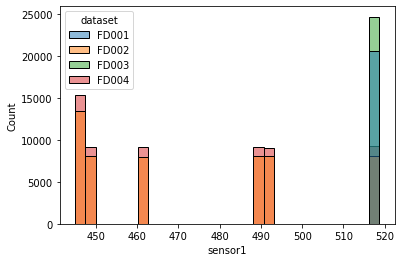

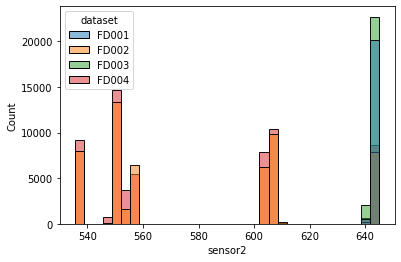

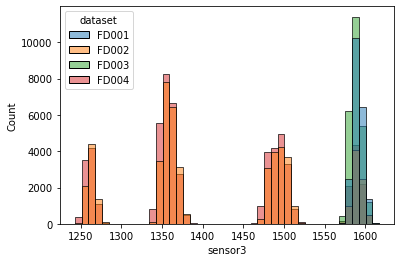

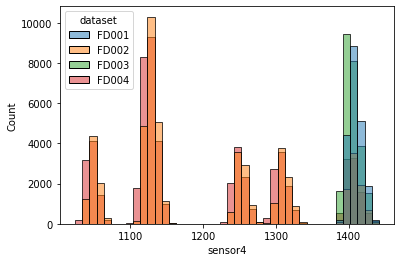

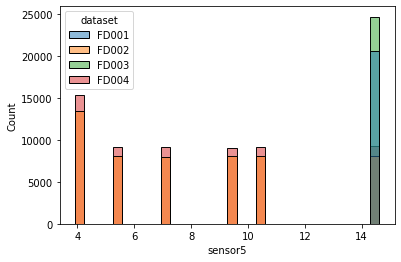

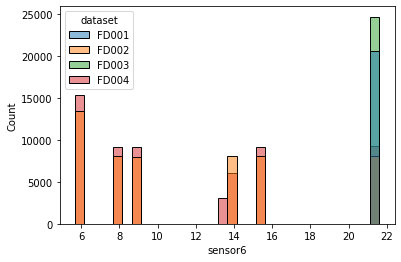

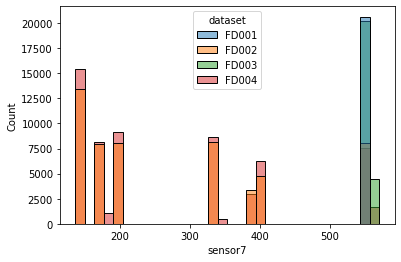

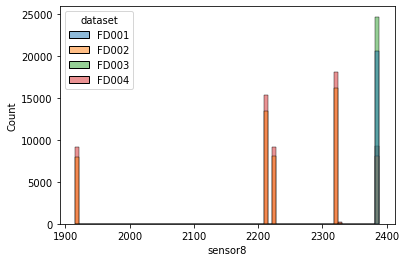

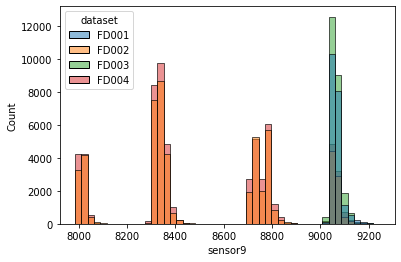

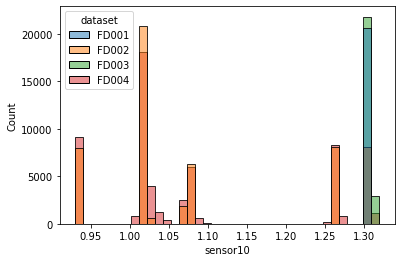

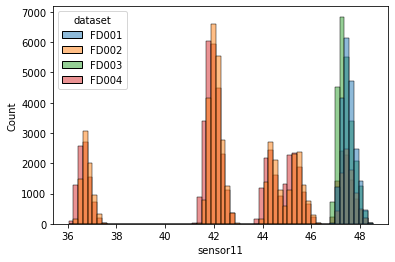

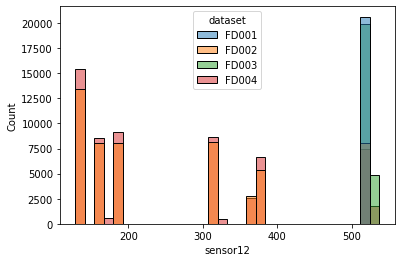

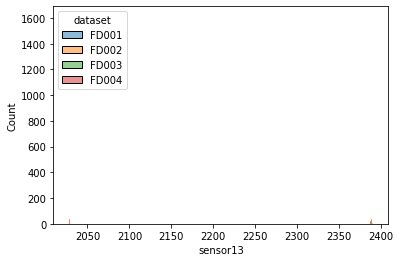

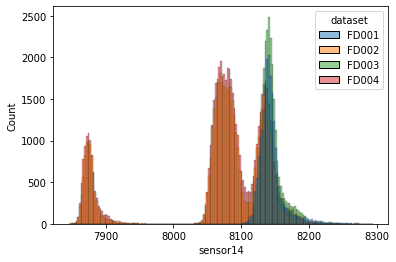

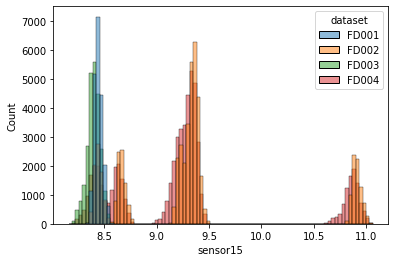

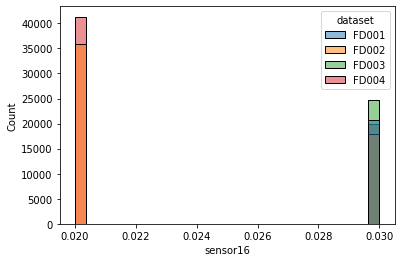

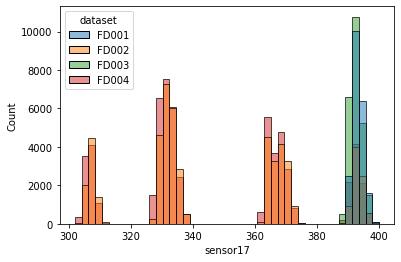

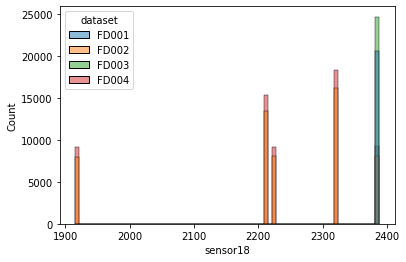

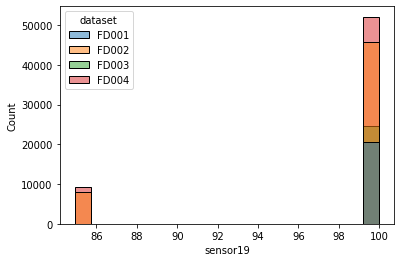

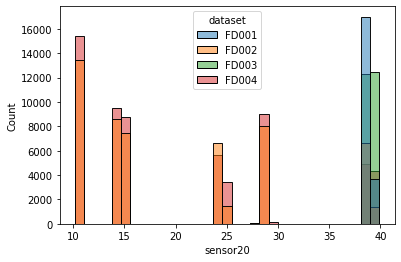

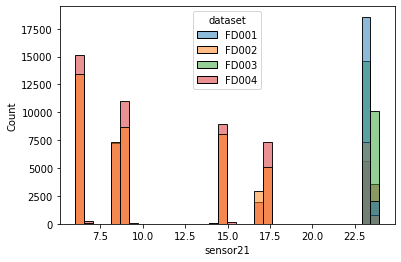

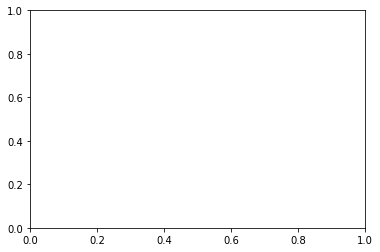

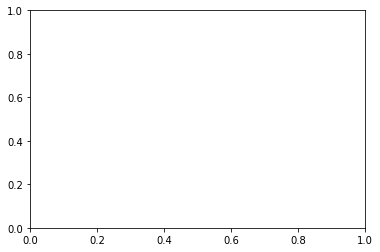

In [ ]:

#histogramy z kolorowaniem po datasetcie
sensors = ['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 
        'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21']
for sensor in sensors:
    sns.histplot(data = train, x = sensor, hue = 'dataset')
    plt.show()


In [49]:
maxi_df = pd.DataFrame(train.groupby(["esn", "dataset"])["cycles"].max().reset_index())
maxi_df.rename(columns = {"cycles" : "max_cycles"}, inplace = True)
maxi_df.head()

esn dataset  max_cycles
0    1   FD001         192
1    1   FD002         149
2    1   FD003         259
3    1   FD004         321
4    2   FD001         287

In [50]:
train1 = train.merge(maxi_df, how = "left", on = ["esn", "dataset"])

In [52]:
train1['rem_cycles'] = train1['cycles'] - train1['max_cycles']

In [56]:
train1.head()

esn  cycles  opset1  opset2  opset3  sensor1  sensor2  sensor3  sensor4  \
0    1       2  0.0019 -0.0003   100.0   518.67   642.15 1,591.82 1,403.14   
1    1       3 -0.0043  0.0003   100.0   518.67   642.35 1,587.99  1,404.2   
2    1       4  0.0007     0.0   100.0   518.67   642.35 1,582.79 1,401.87   
3    1       5 -0.0019 -0.0002   100.0   518.67   642.37 1,582.85 1,406.22   
4    1       6 -0.0043 -0.0001   100.0   518.67    642.1 1,584.47 1,398.37   

   sensor5  sensor6  sensor7  sensor8  sensor9  sensor10  sensor11  sensor12  \
0    14.62    21.61   553.75 2,388.04 9,044.07       1.3     47.49    522.28   
1    14.62    21.61   554.26 2,388.08 9,052.94       1.3     47.27    522.42   
2    14.62    21.61   554.45 2,388.11 9,049.48       1.3     47.13    522.86   
3    14.62    21.61    554.0 2,388.06 9,055.15       1.3     47.28    522.19   
4    14.62    21.61   554.67 2,388.02 9,049.68       1.3     47.16    521.68   

   sensor13  sensor14  sensor15  sensor16  sensor17  sensor18  sensor19  \
0  2,388.07  8,131.49    8.4318      0.03       392      2388     100.0   
1  2,388.03  8,133.23    8.4178      0.03       390      2388     100.0   
2  2,388.08  8,133.83    8.3682      0.03       392      2388     100.0   
3  2,388.04   8,133.8    8.4294      0.03       393      2388     100.0   
4  2,388.03  8,132.85    8.4108      0.03       391      2388     100.0   

   sensor20  sensor21 dataset  max_cycles  rem_cycles  
0      39.0   23.4236   FD001         192        -190  
1     38.95   23.3442   FD001         192        -189  
2     38.88   23.3739   FD001         192        -188  
3      38.9   23.4044   FD001         192        -187  
4     38.98   23.3669   FD001         192        -186

In [68]:
train1.opset3.unique()

array([100.,  60.])

<Figure size 2160x576 with 0 Axes>

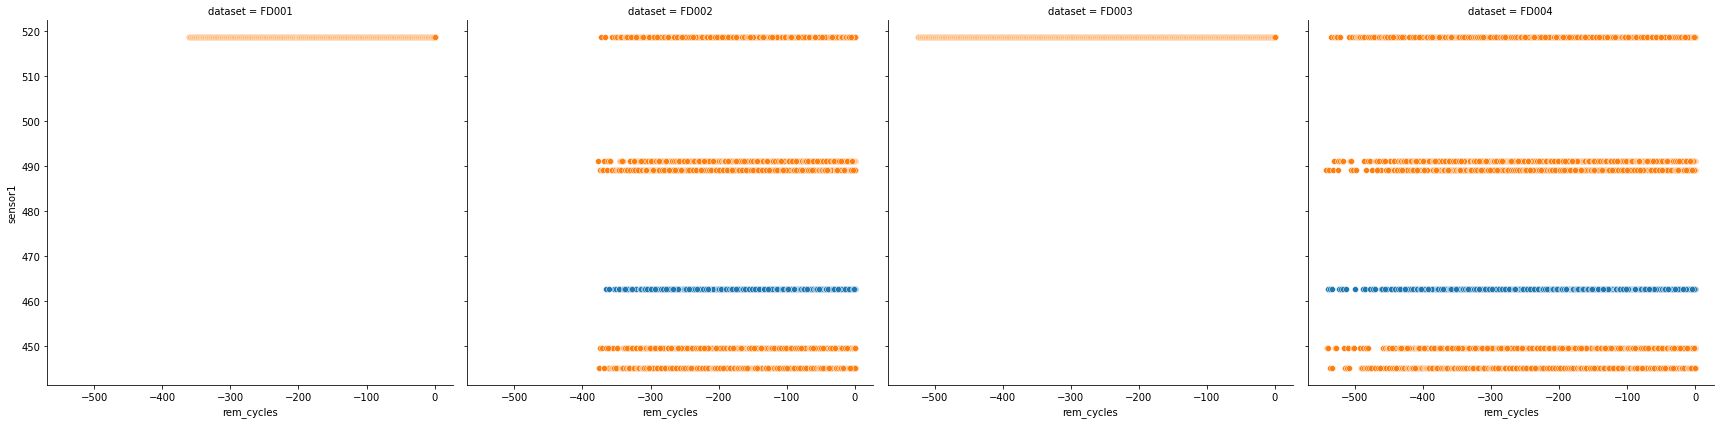

<Figure size 2160x576 with 0 Axes>

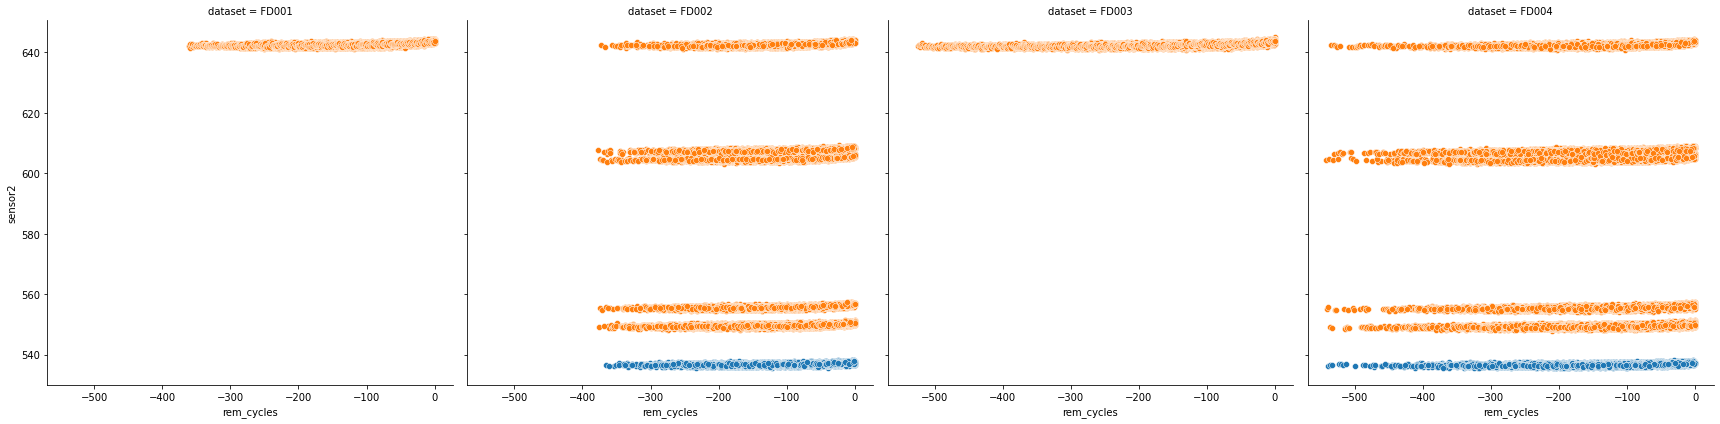

<Figure size 2160x576 with 0 Axes>

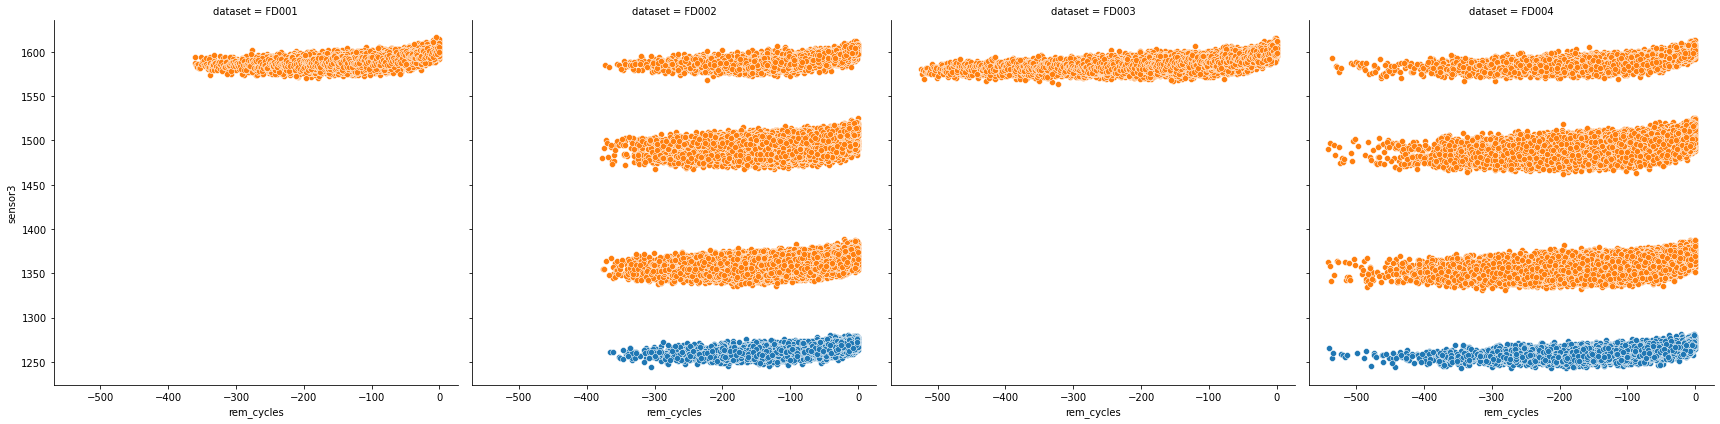

<Figure size 2160x576 with 0 Axes>

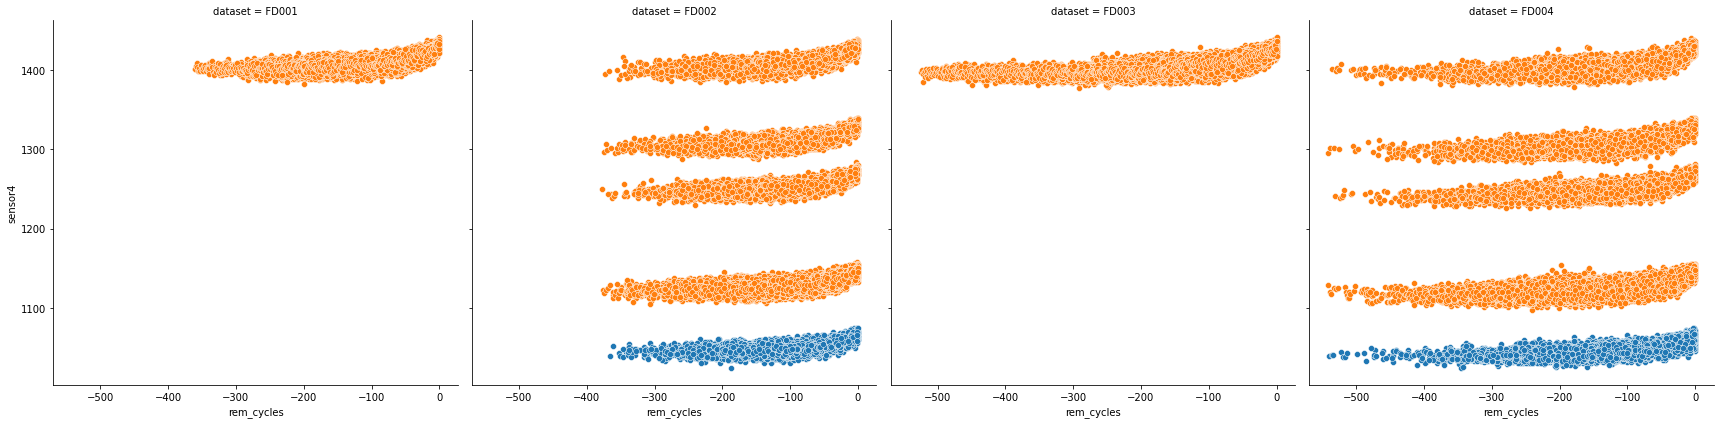

<Figure size 2160x576 with 0 Axes>

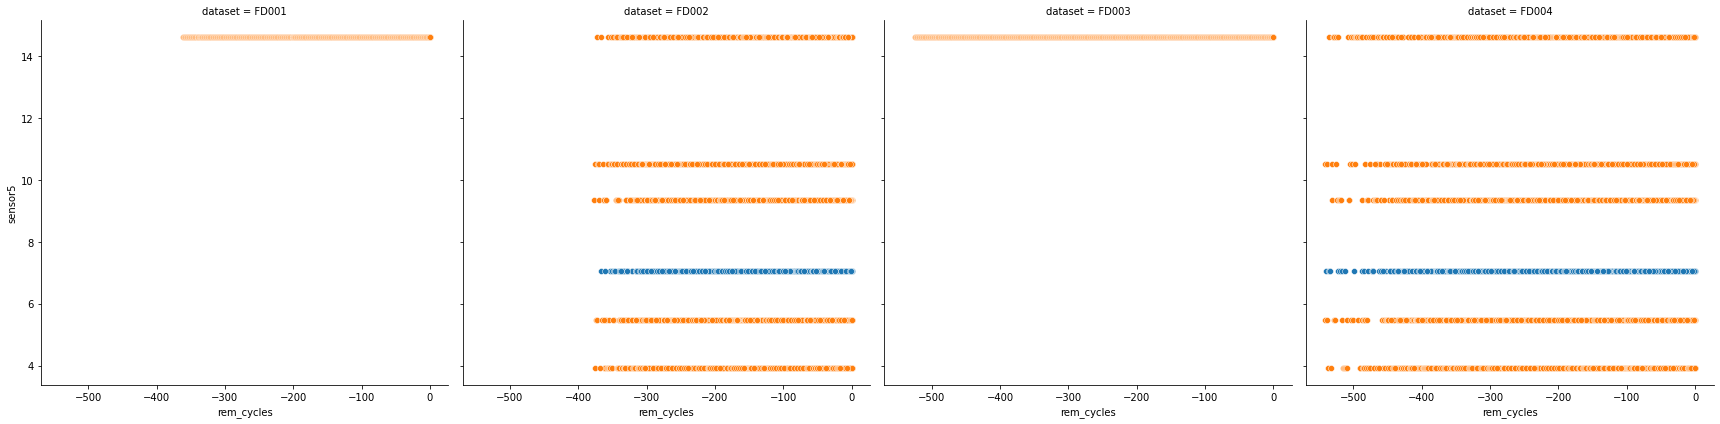

<Figure size 2160x576 with 0 Axes>

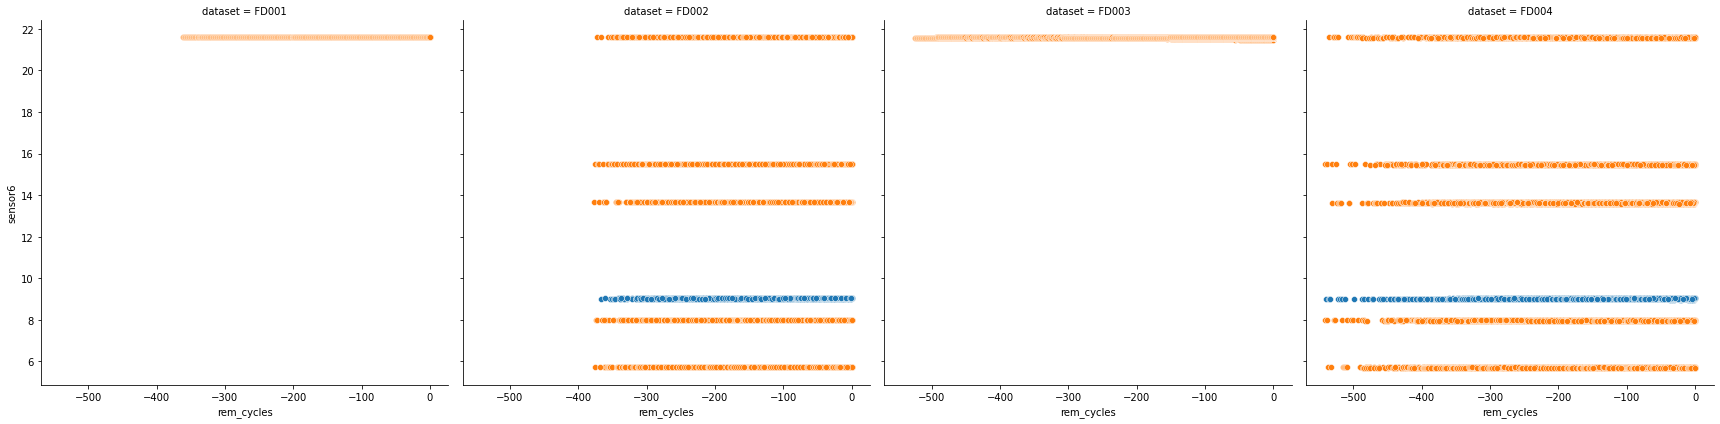

<Figure size 2160x576 with 0 Axes>

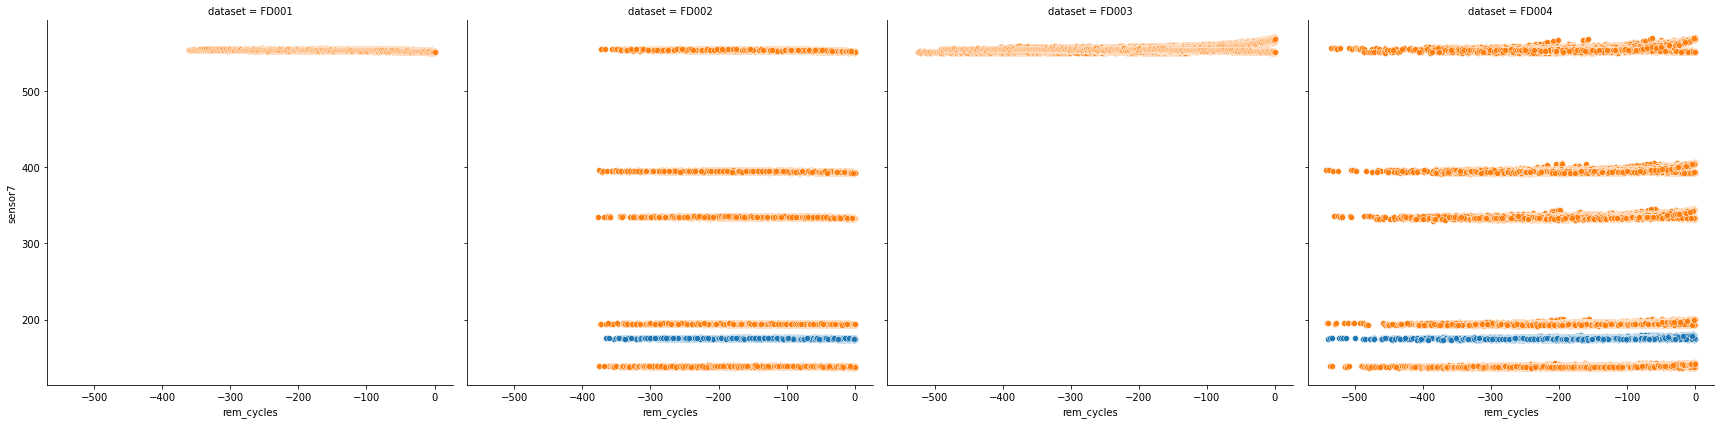

<Figure size 2160x576 with 0 Axes>

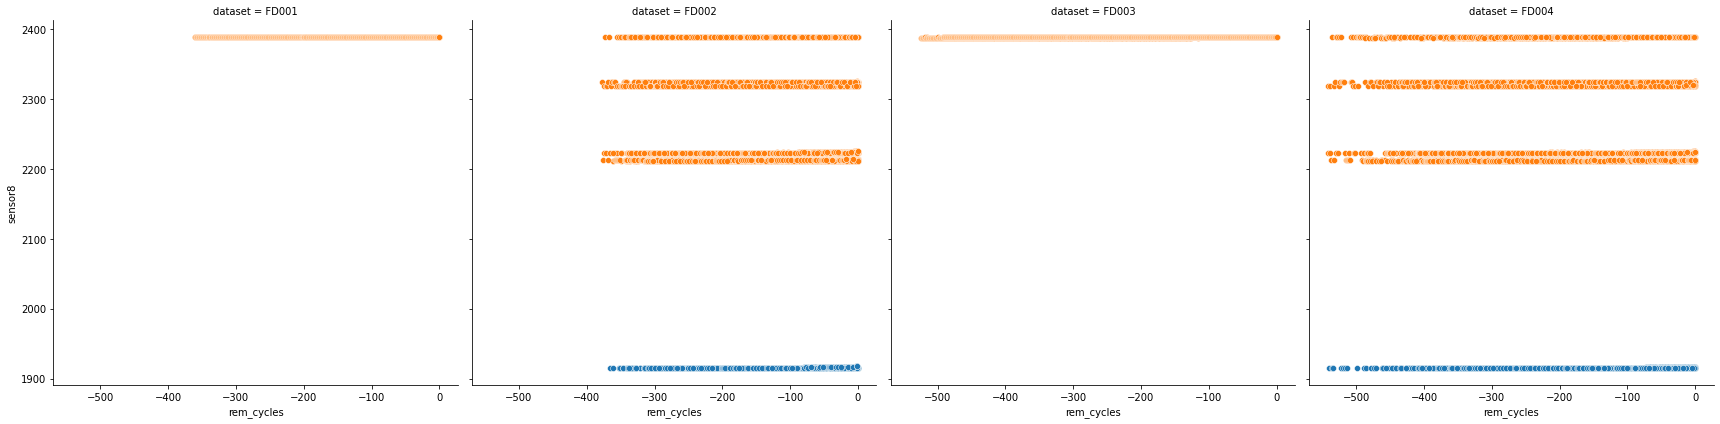

<Figure size 2160x576 with 0 Axes>

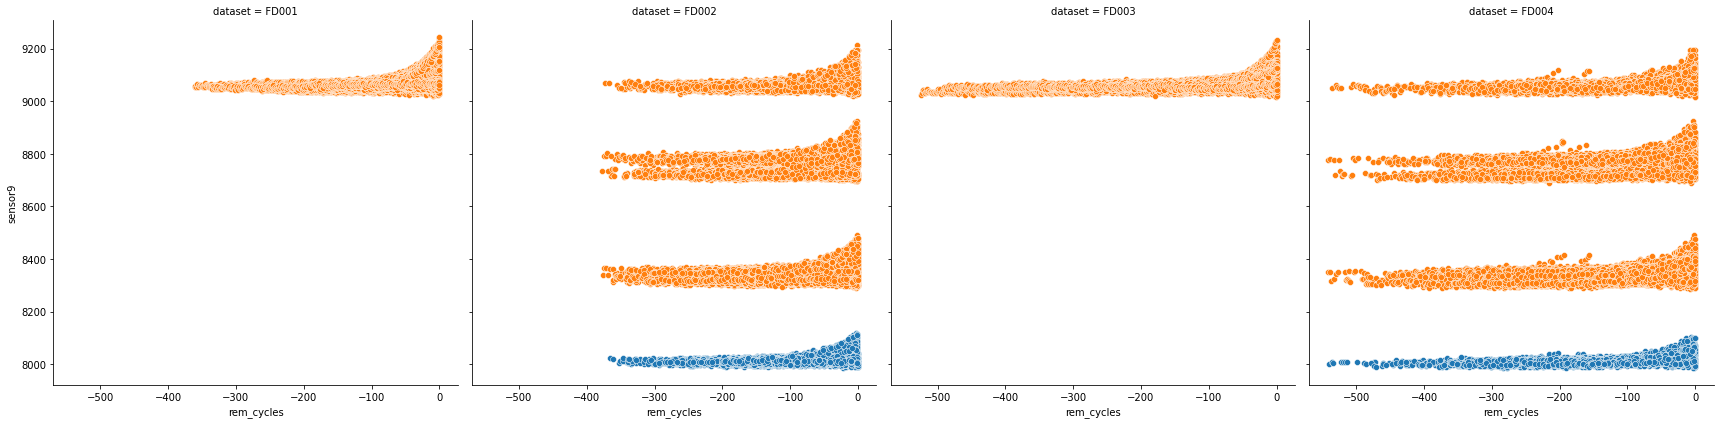

<Figure size 2160x576 with 0 Axes>

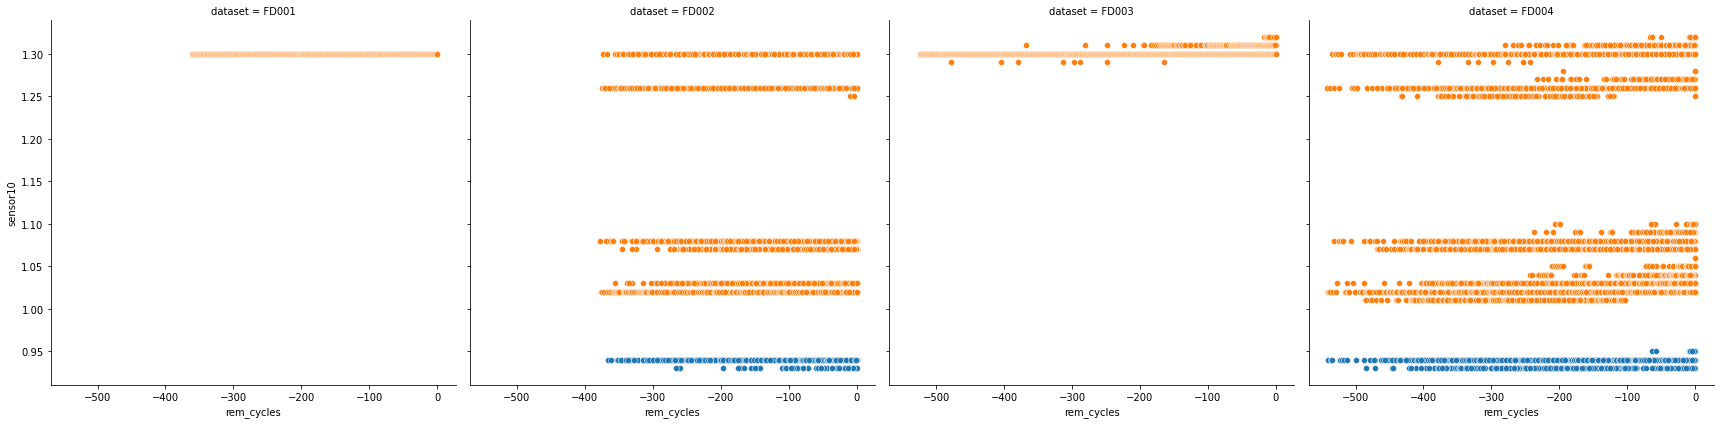

<Figure size 2160x576 with 0 Axes>

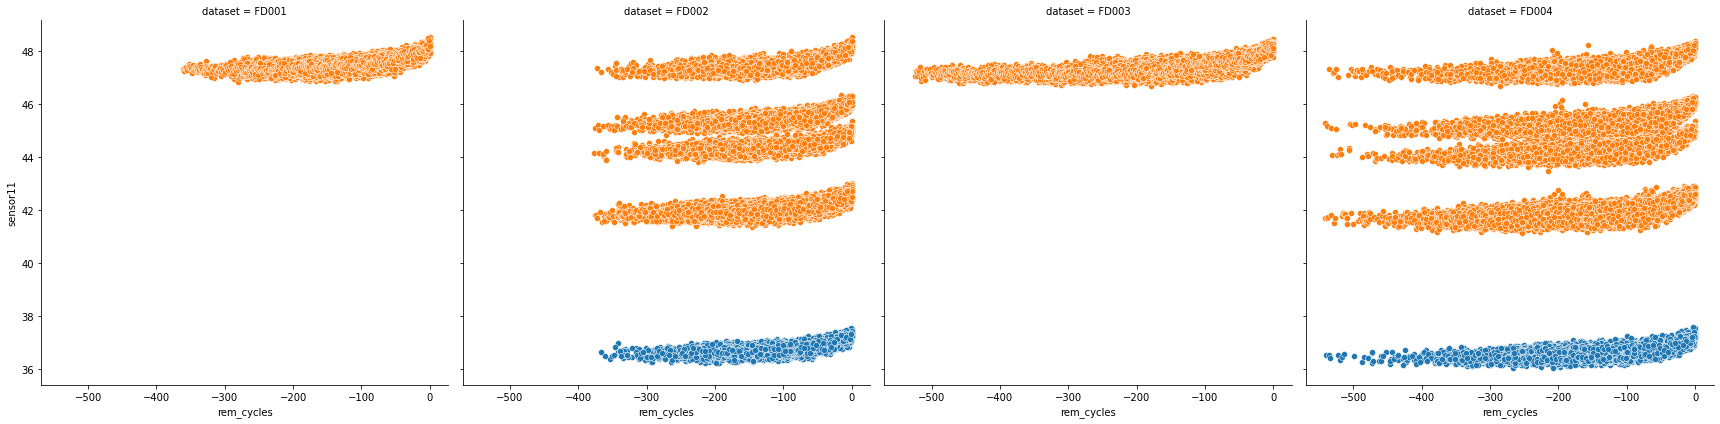

<Figure size 2160x576 with 0 Axes>

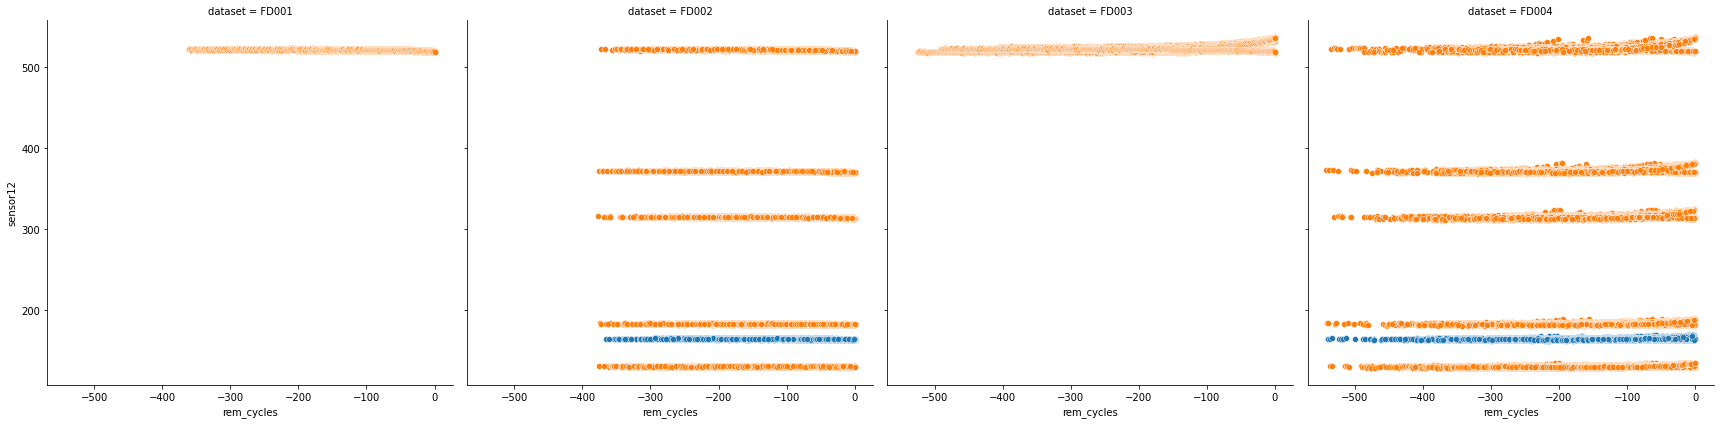

<Figure size 2160x576 with 0 Axes>

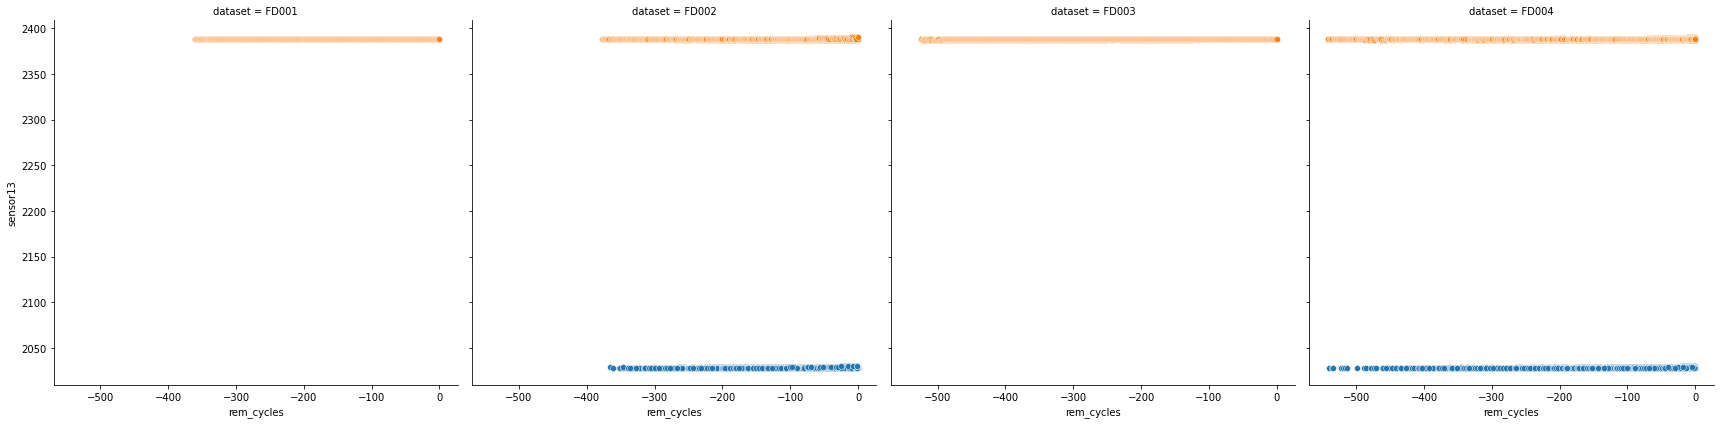

<Figure size 2160x576 with 0 Axes>

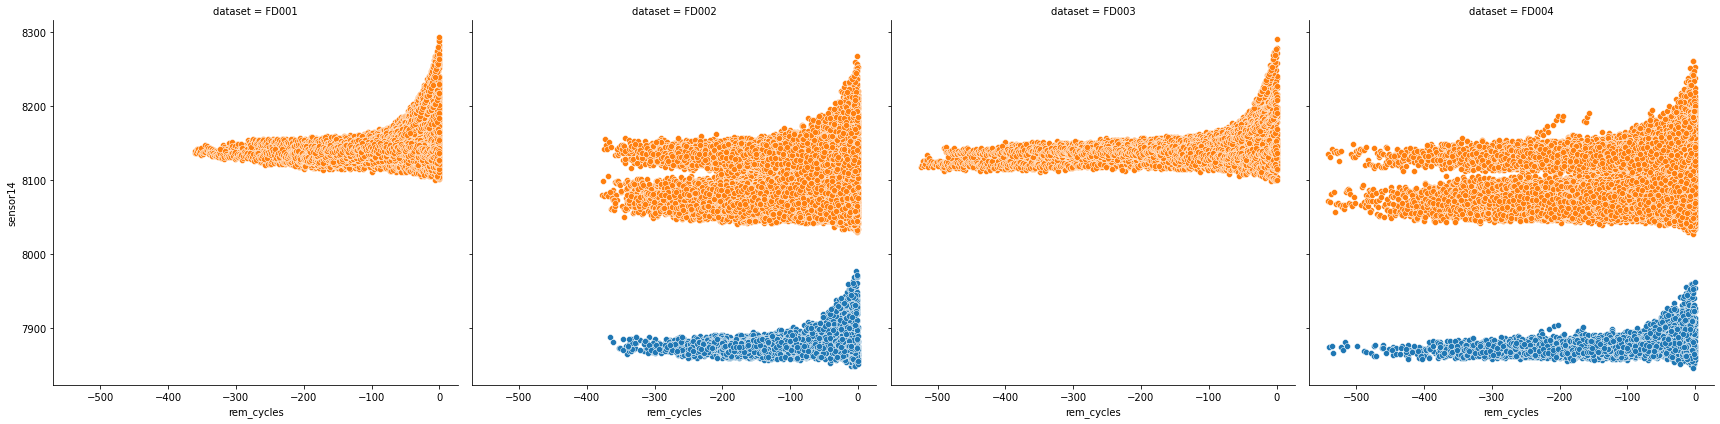

<Figure size 2160x576 with 0 Axes>

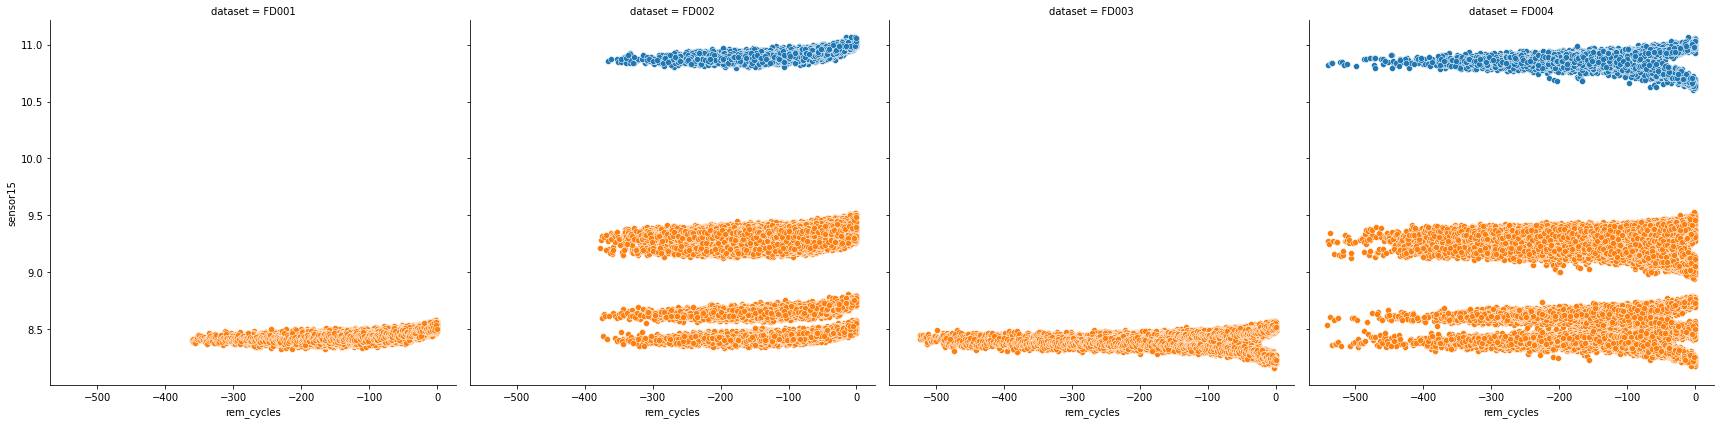

<Figure size 2160x576 with 0 Axes>

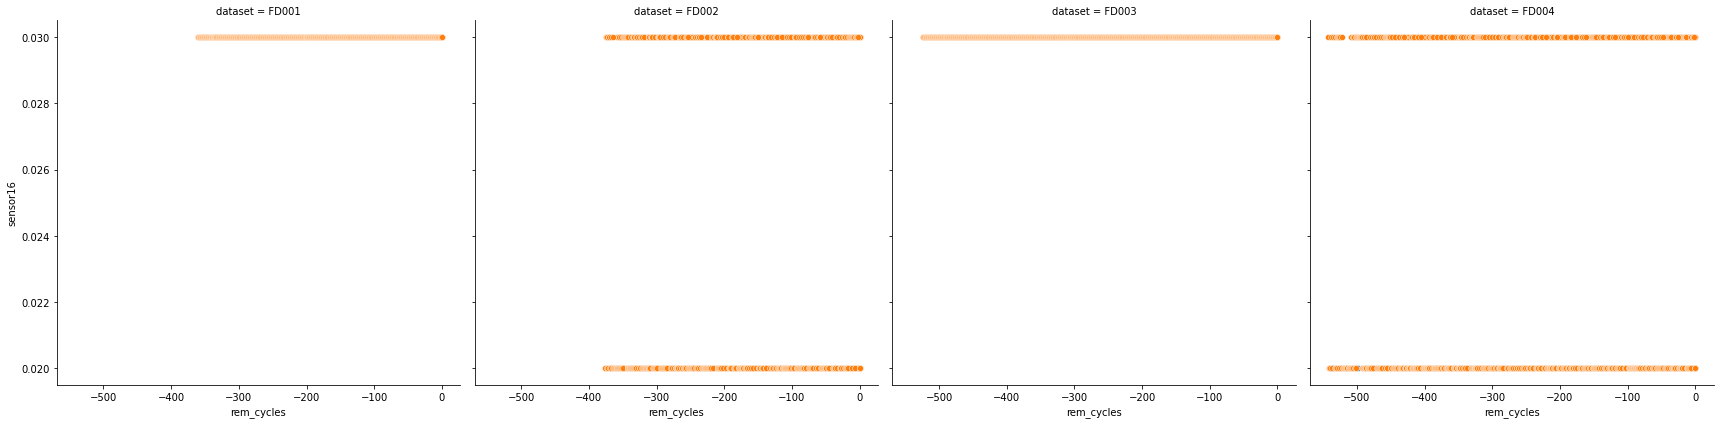

<Figure size 2160x576 with 0 Axes>

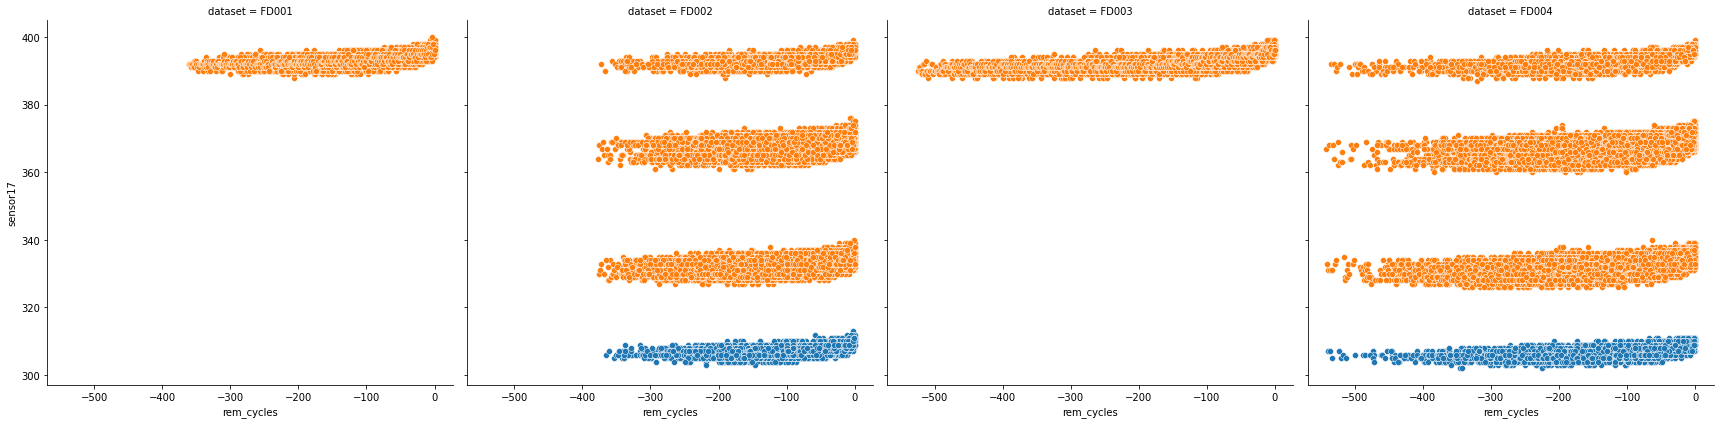

<Figure size 2160x576 with 0 Axes>

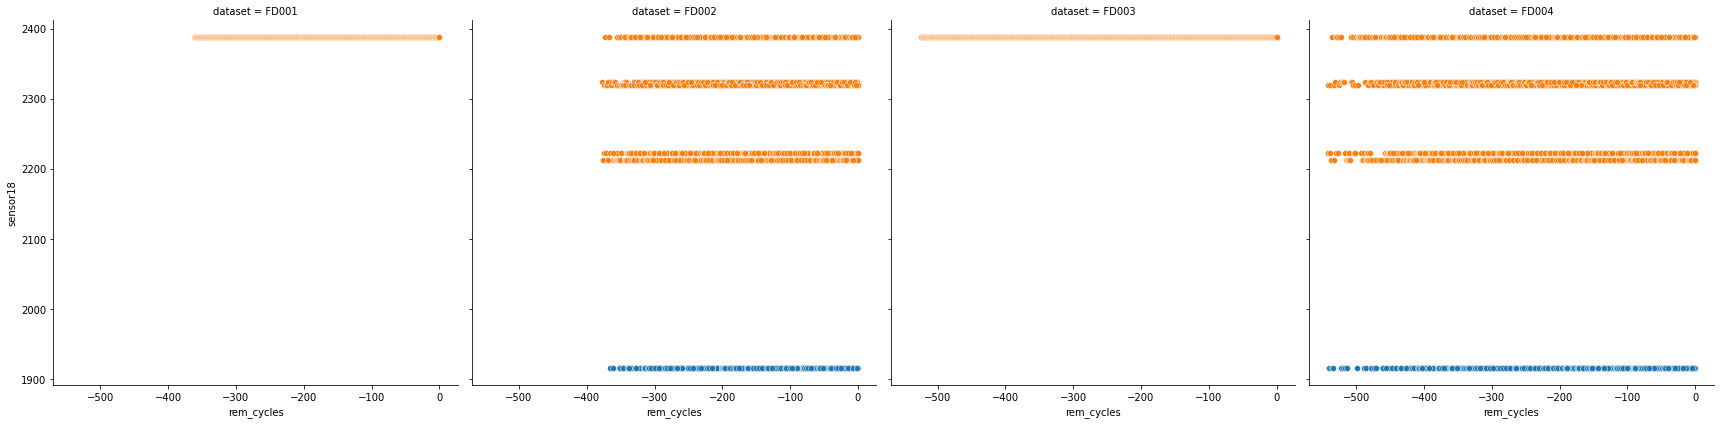

<Figure size 2160x576 with 0 Axes>

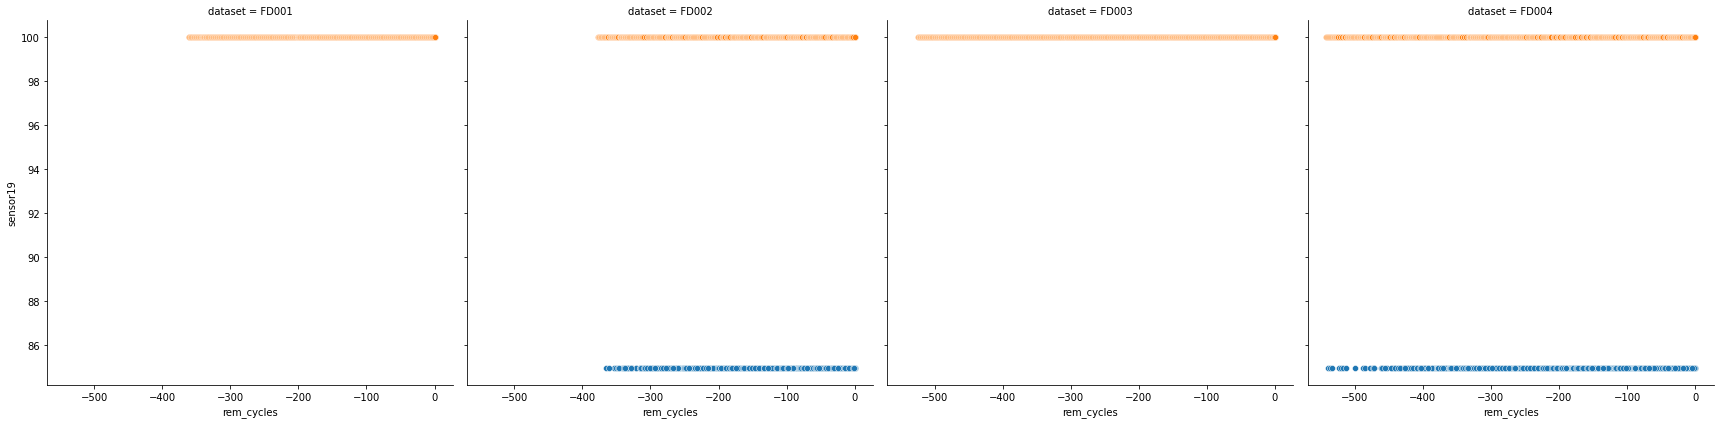

<Figure size 2160x576 with 0 Axes>

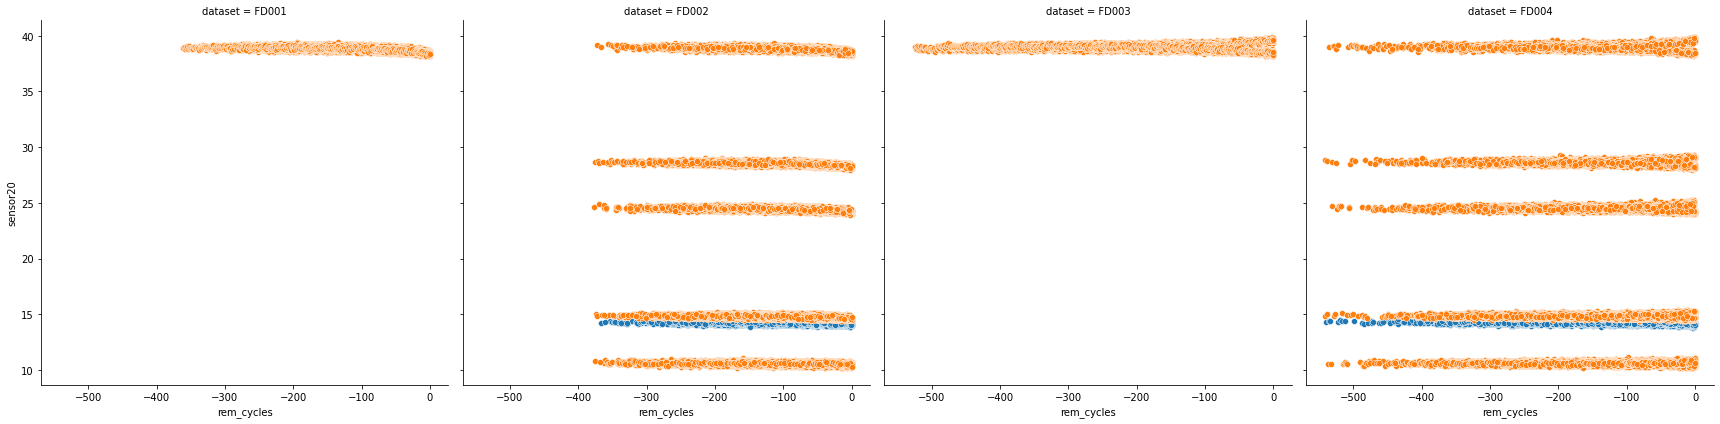

<Figure size 2160x576 with 0 Axes>

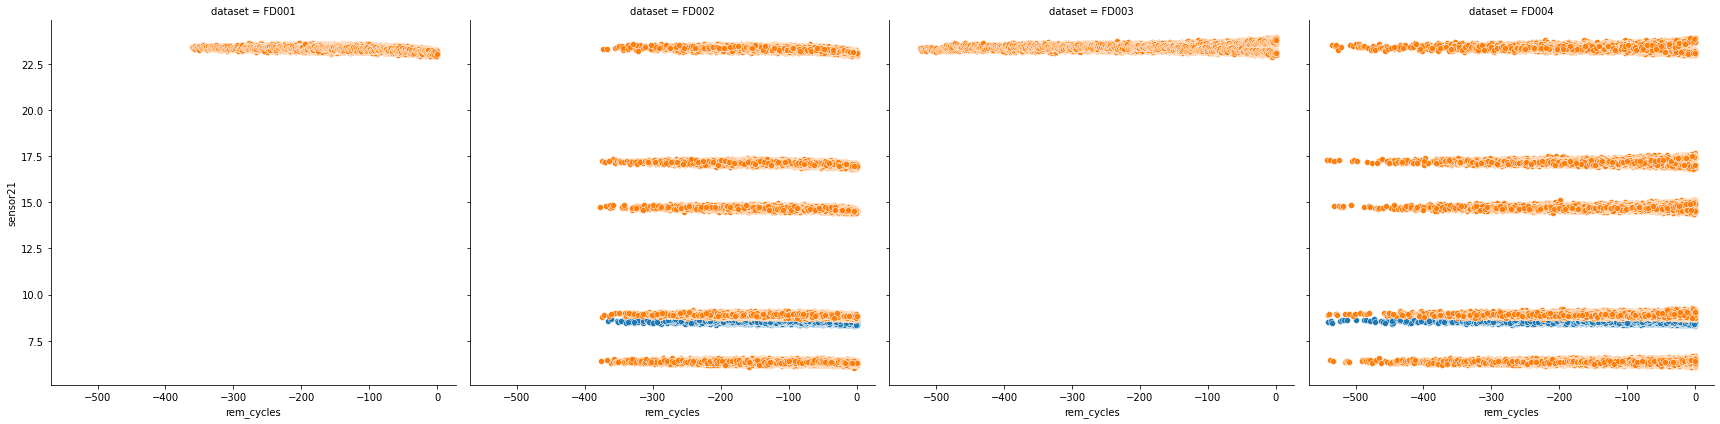

In [69]:
sensors = ['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 
        'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21']
for sensor in sensors:    
    g = sns.FacetGrid(data = train1, col = "dataset", hue= "opset3",size=6)
    g.map(sns.scatterplot, "rem_cycles", sensor)
    plt.show()

Po opset 1 możemy rozróżnić 6 różnych trybów latania (conditions (Sea Level i inne))
Sprowadzamy 3 zmienne quasi ciągłe do jednej zmiennej z 6 poziomami >> kategoriami.
bo 0,0 to Sea Level
10, 0.22 to condition 2
20, 0.7 to condition 3
Niebieski to opset 1:  (25, 0.6)
opset 2 nie rozróżnia conditions 5 i 6, dlatego opset 1 wystarcza.



In [ ]:
train.opset1

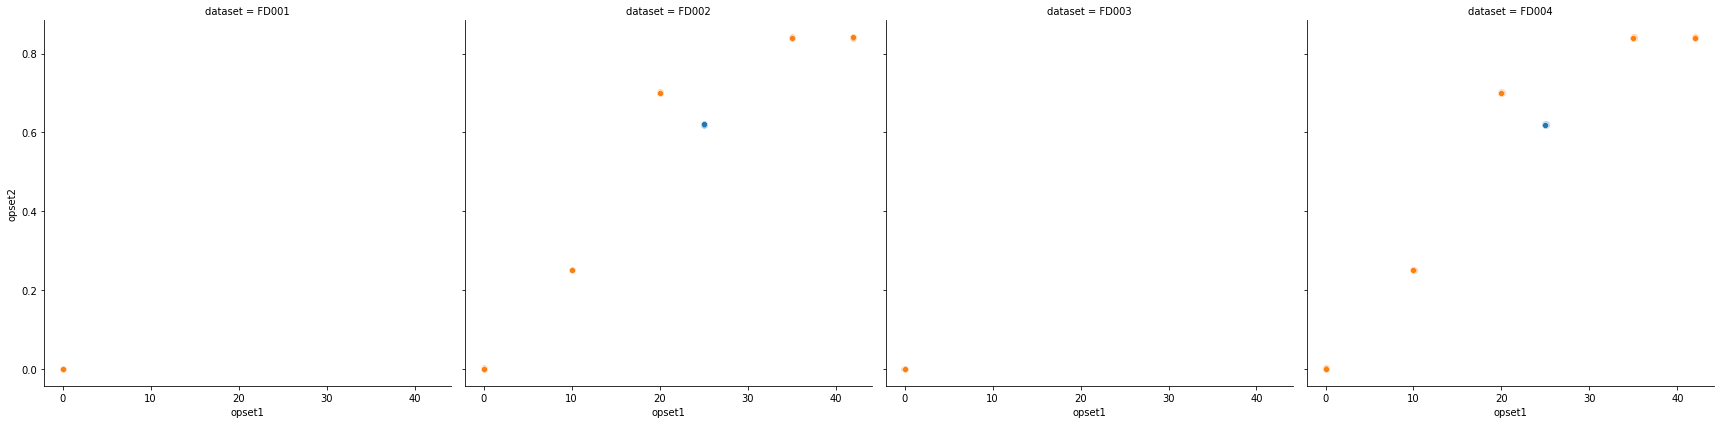

In [71]:
x = "opset1"
y = "opset2"
hue = "opset3"
g = sns.FacetGrid(data = train1, col = "dataset", hue= "opset3", size=6)
g.map(sns.scatterplot, x, y)
plt.show()


In [70]:
train1.describe()

esn             cycles             opset1  \
count          160,355.0          160,355.0          160,355.0   
mean  105.55636556390509 123.33438932368807 17.211922257491192   
std      72.866362604896  83.53695309314152  16.52790707957651   
min                  1.0                1.0            -0.0087   
25%                 44.0               57.0             0.0013   
50%                 89.0              114.0            19.9981   
75%                164.0              173.0            35.0015   
max                260.0              543.0             42.008   

                  opset2             opset3            sensor1  \
count          160,355.0          160,355.0          160,355.0   
mean  0.4100034111814411   95.7242368494902 485.84096224002985   
std   0.3679368490270224 12.359179910937495 30.420239839414275   
min              -0.0006               60.0              445.0   
25%               0.0002              100.0             449.44   
50%                 0.62              100.0             489.05   
75%                 0.84              100.0             518.67   
max                0.842              100.0             518.67   

                sensor2            sensor3             sensor4  \
count         160,355.0          160,355.0           160,355.0   
mean   597.361023416794 1,467.035610177419 1,260.9564107760907   
std   42.47845592923608 118.17526792883352  136.30005277905528   
min              535.48           1,242.67            1,023.77   
25%              549.96           1,357.36            1,126.83   
50%              605.93           1,492.81            1,271.74   
75%              642.34           1,586.59             1,402.2   
max              645.11           1,616.91            1,441.49   

                sensor5            sensor6            sensor7  \
count         160,355.0          160,355.0          160,355.0   
mean  9.895005331919803 14.424940164011103  359.7299588413209   
std   4.265534609958304  6.443895976302771 174.13327950808818   
min                3.91               5.67             136.17   
25%                5.48                8.0             175.71   
50%                9.35              13.66             341.69   
75%               14.62              21.61             553.29   
max               14.62              21.61             570.81   

                  sensor8           sensor9            sensor10  \
count           160,355.0         160,355.0           160,355.0   
mean  2,273.8289884942783 8,677.55337563531   1.153704717657697   
std    142.42767744112453 374.6577105081706 0.14210293430351725   
min              1,914.72          7,984.51                0.93   
25%              2,212.12          8,334.77                1.02   
50%              2,319.37           8,764.2                1.09   
75%              2,388.05          9,055.85                 1.3   
max              2,388.64          9,244.59                1.32   

               sensor11           sensor12           sensor13  \
count         160,355.0          160,355.0          160,355.0   
mean  44.21203922546849  338.7898102959059 2,349.644287861308   
std   3.426356419080013 164.19296351635052 111.16846432465698   
min               36.04             128.31           2,027.57   
25%               42.01             164.79           2,387.97   
50%               44.93             321.69           2,388.07   
75%               47.34             521.34           2,388.16   
max               48.53             537.49           2,390.49   

                 sensor14           sensor15             sensor16  \
count           160,355.0          160,355.0            160,355.0   
mean  8,088.9506511178315   9.05475118767734  0.02518536996040037   
std     80.62397346405147 0.7515864047763415 0.004996578195980995   
min              7,845.78             8.1563                 0.02   
25%              8,070.53             8.4393                 0.02   
50%              8,118.59             9.0301  

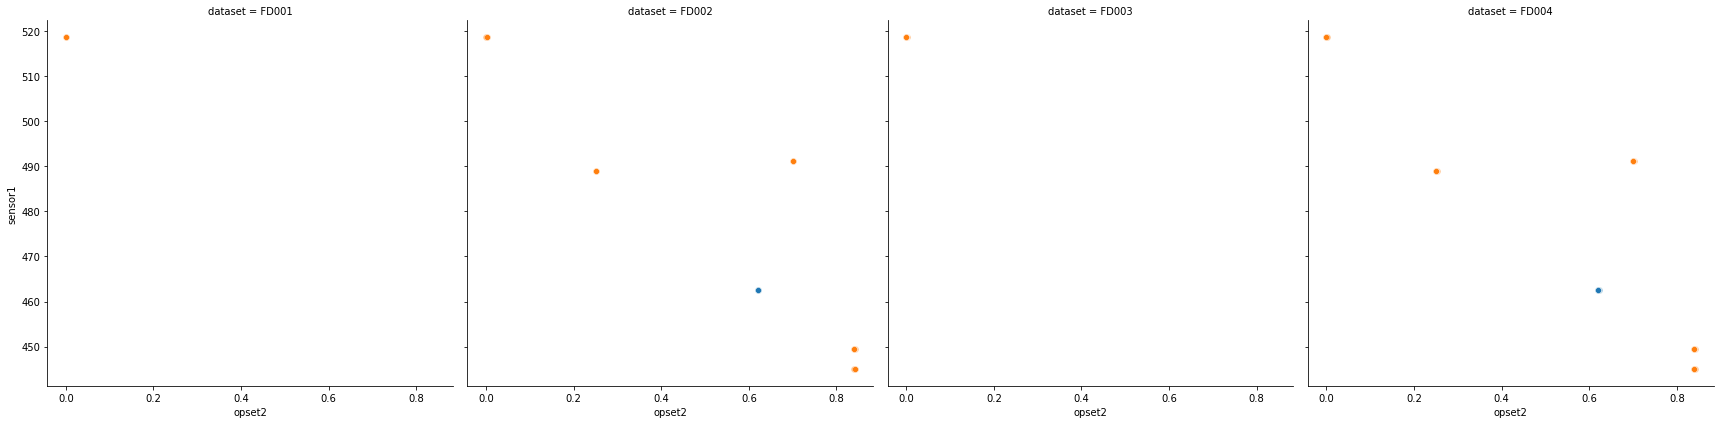

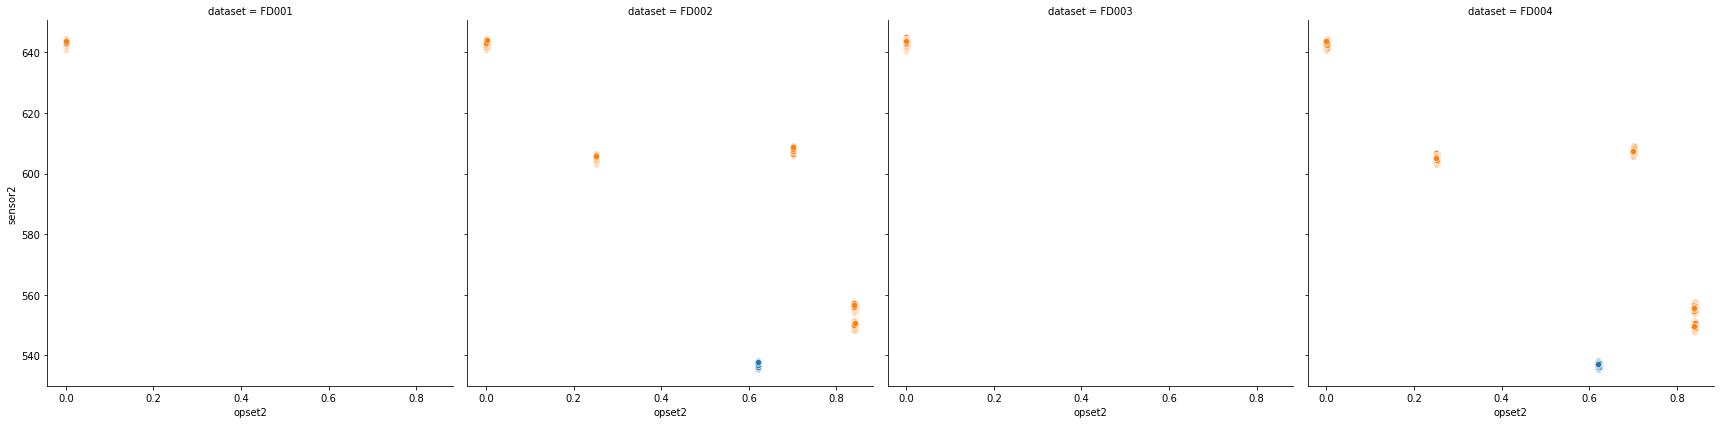

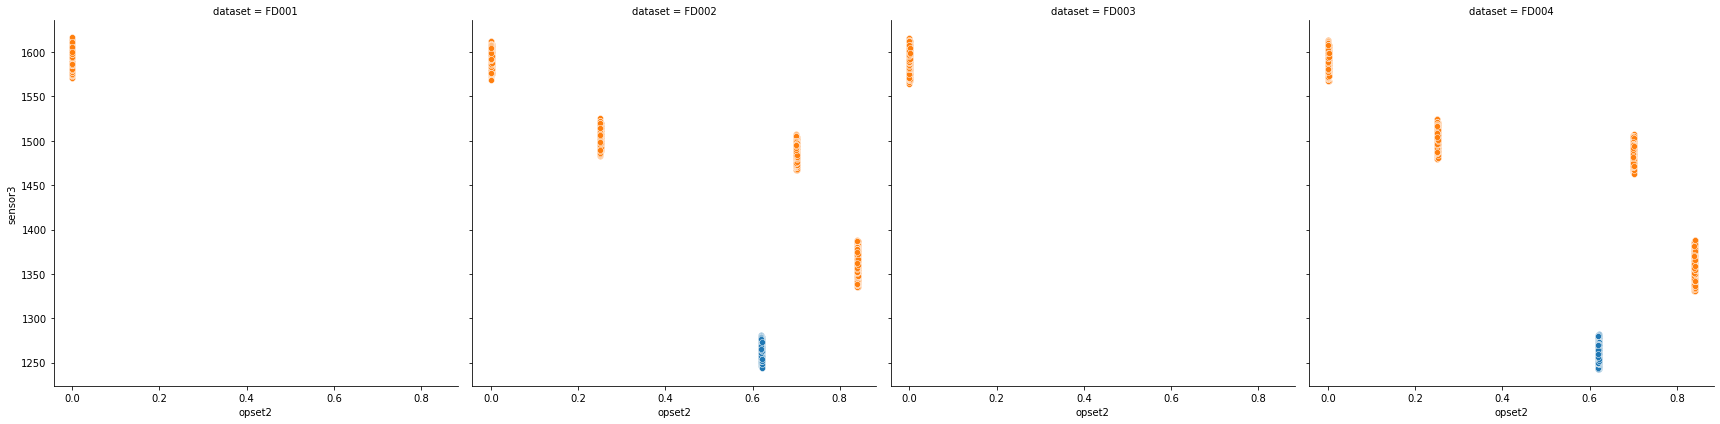

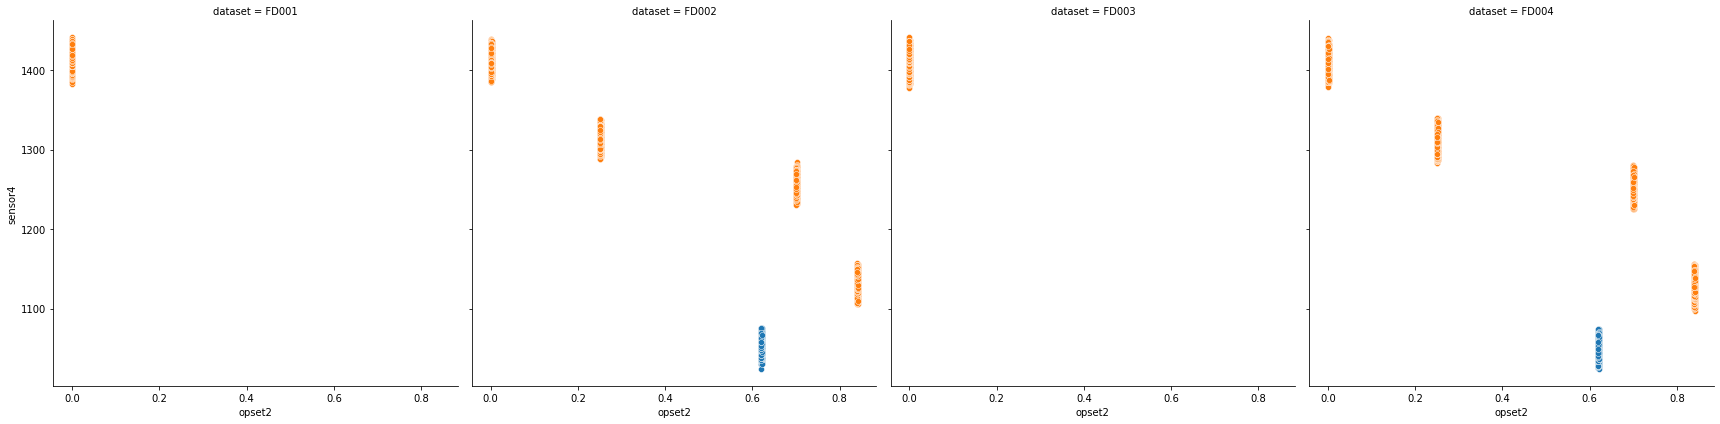

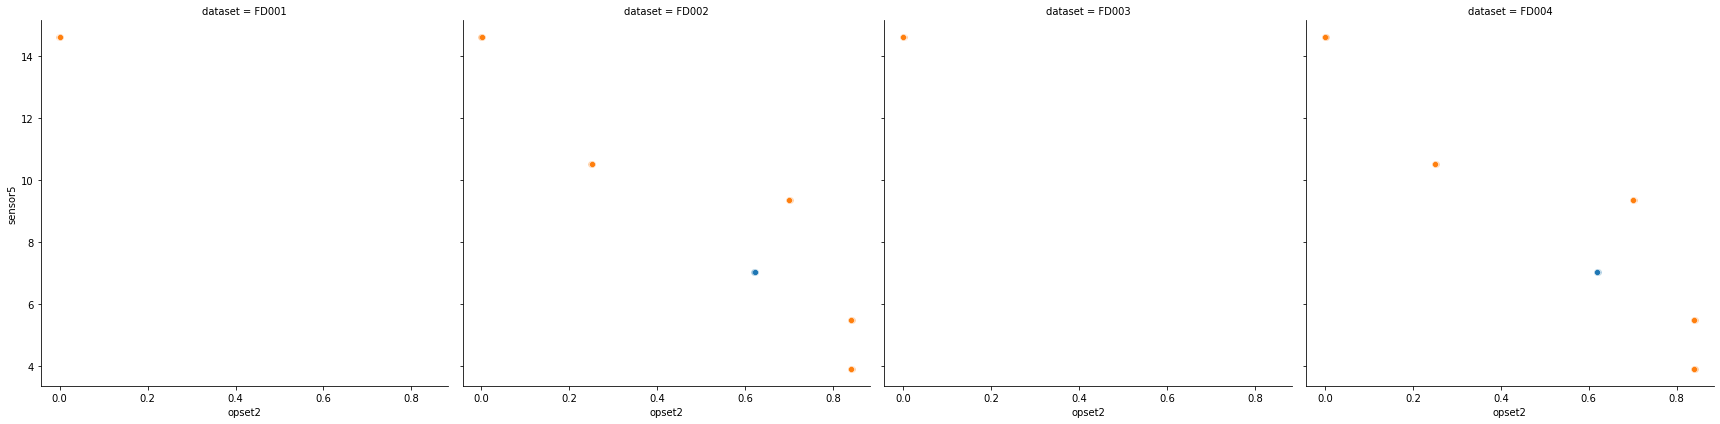

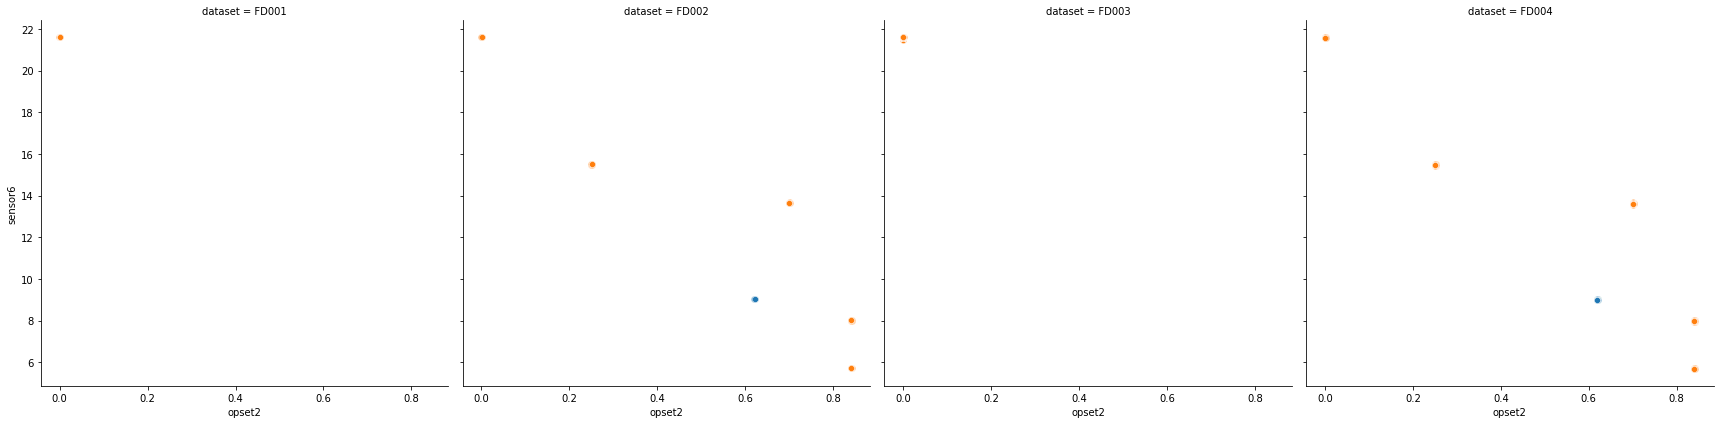

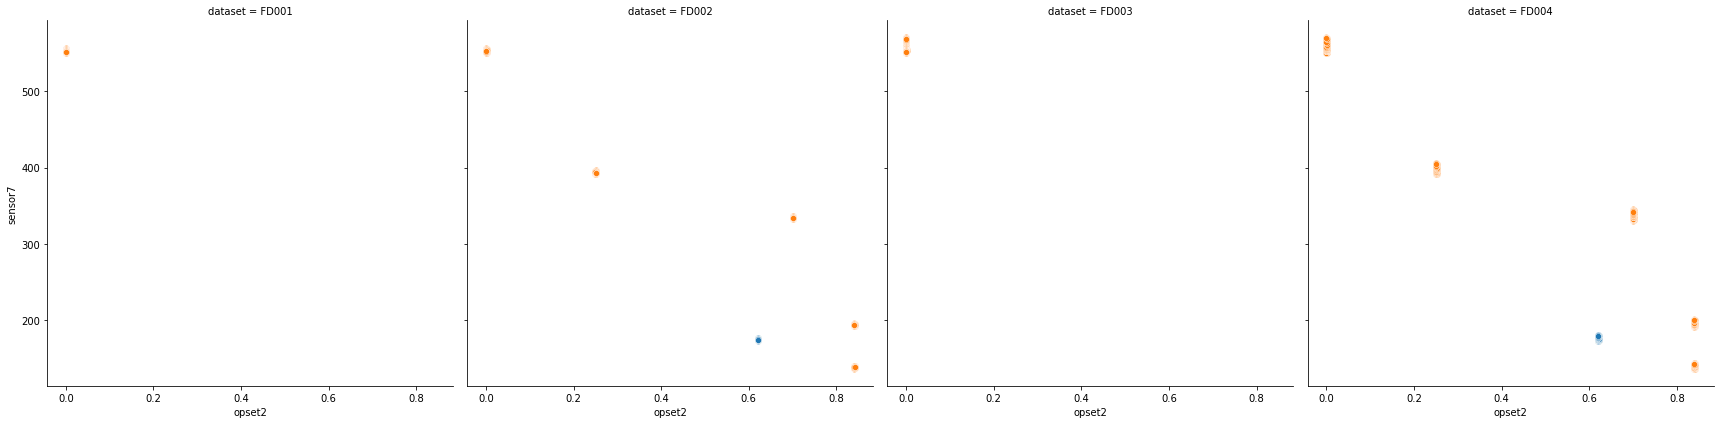

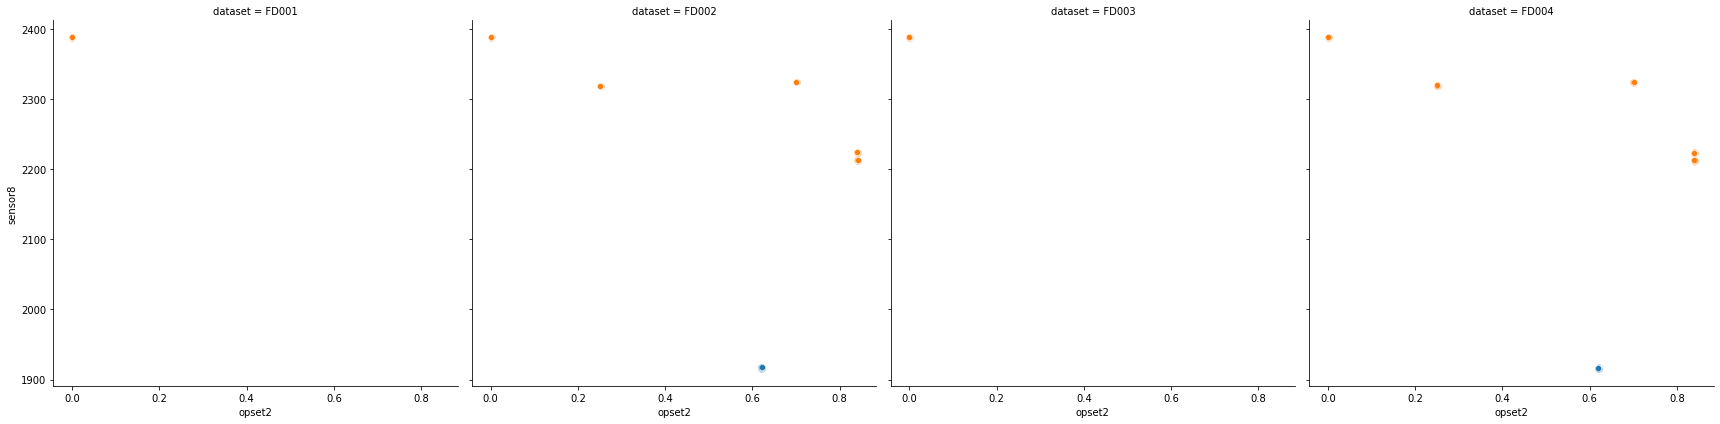

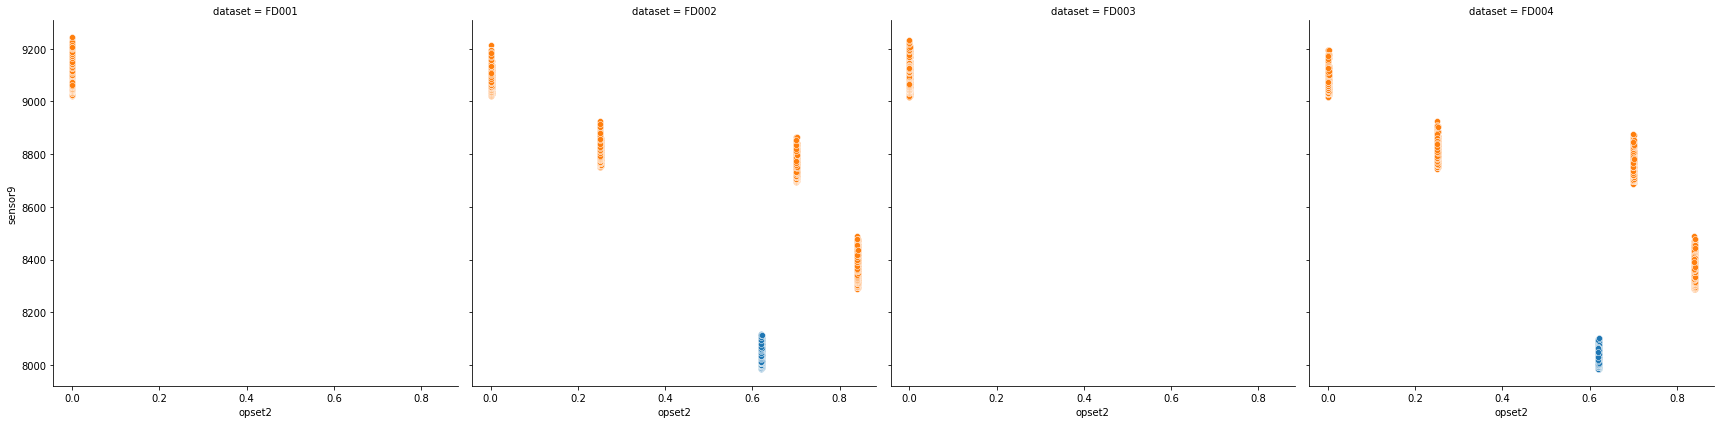

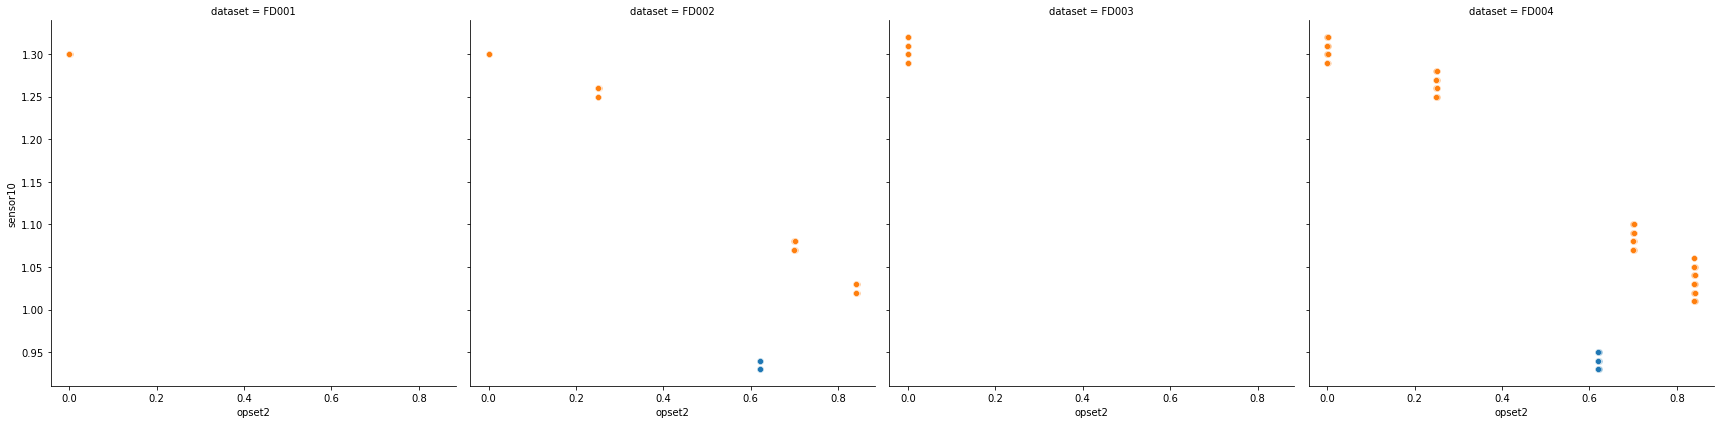

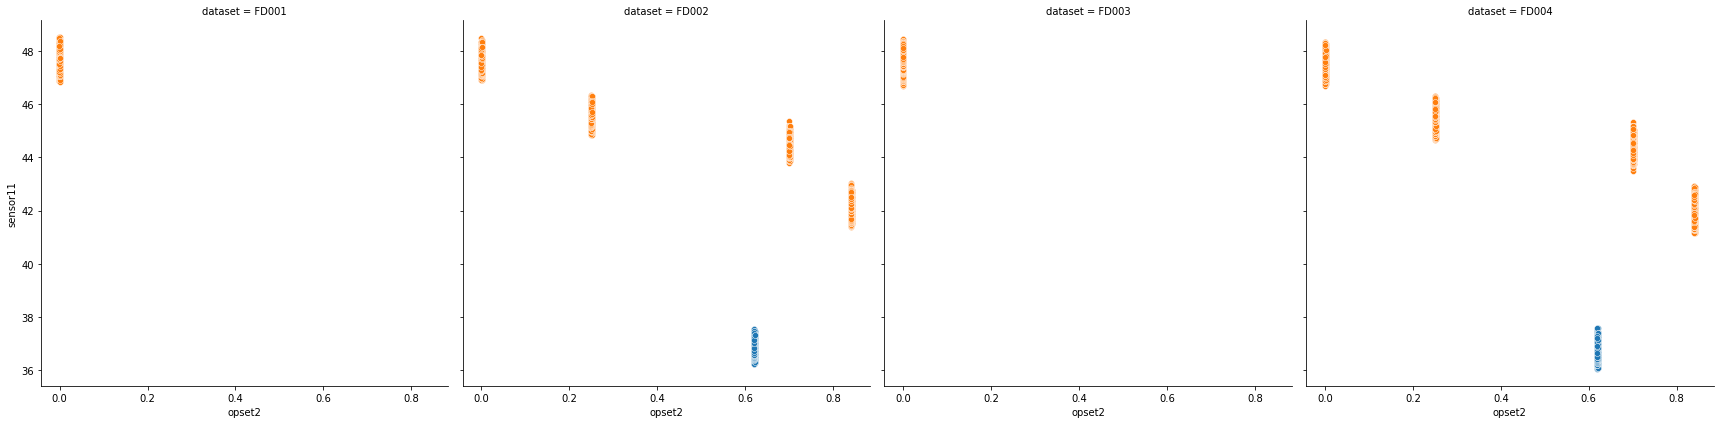

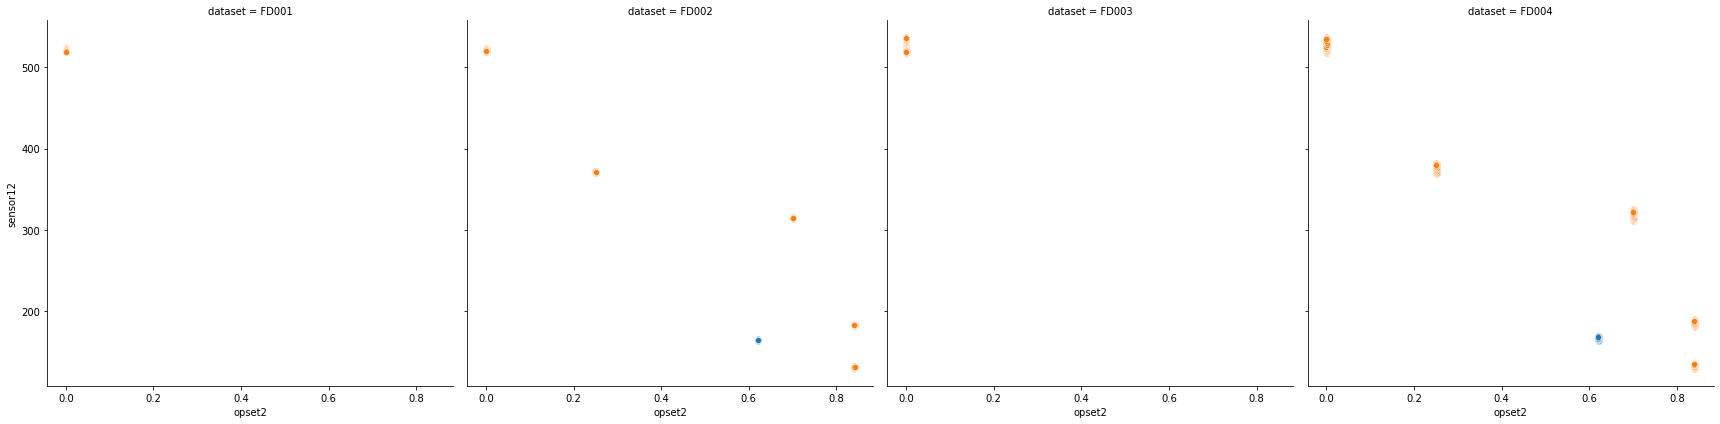

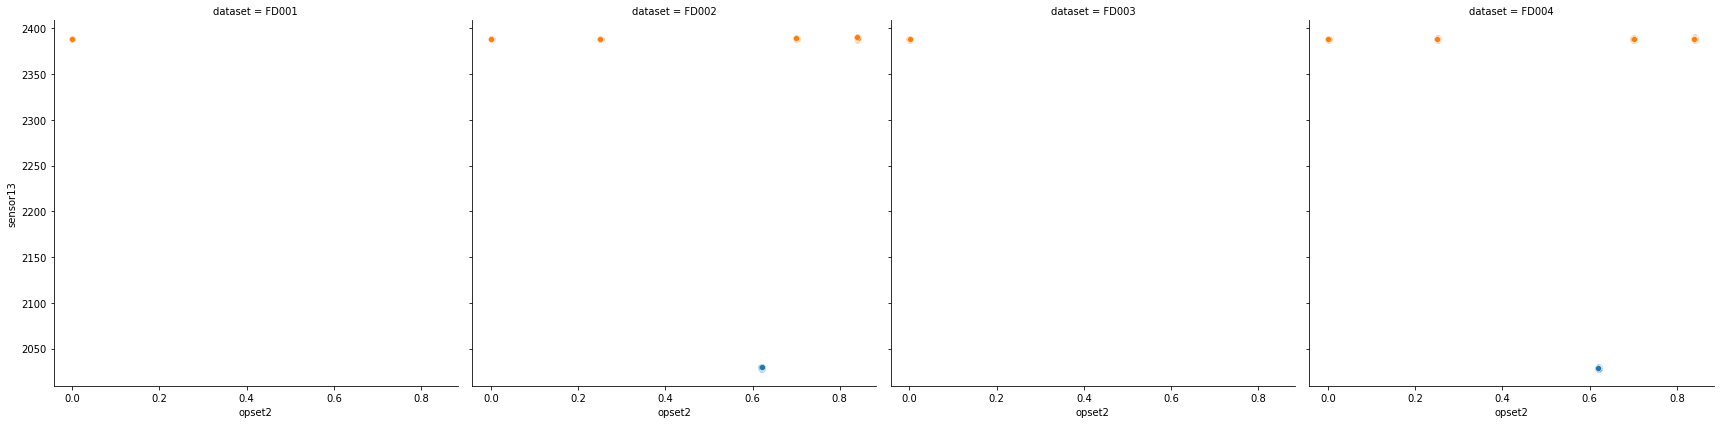

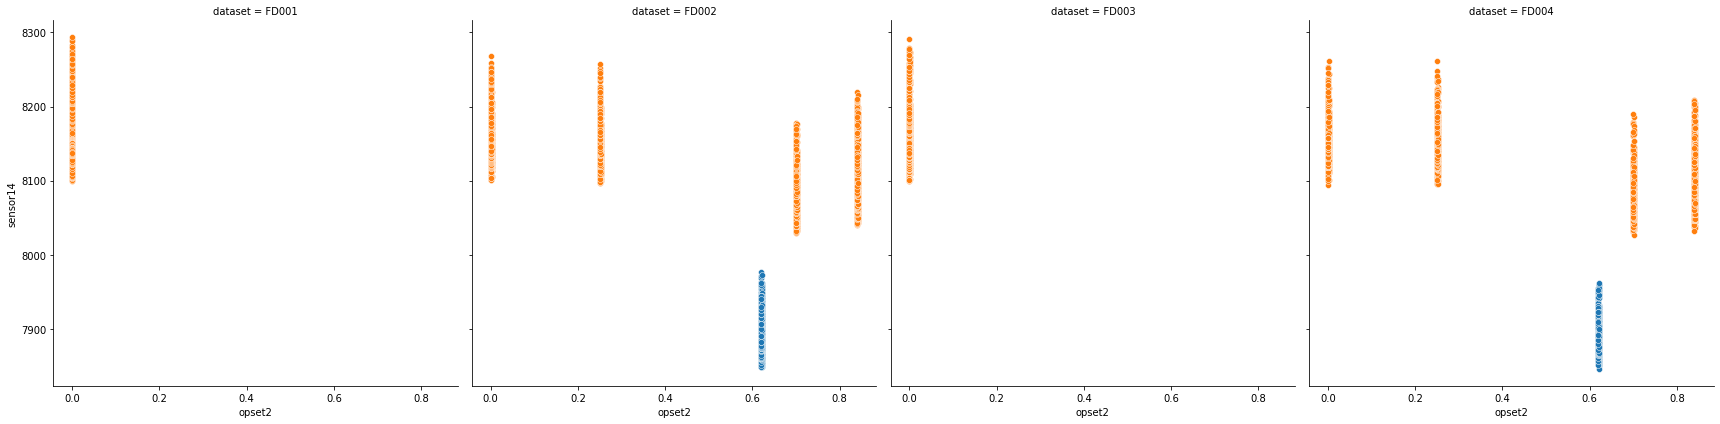

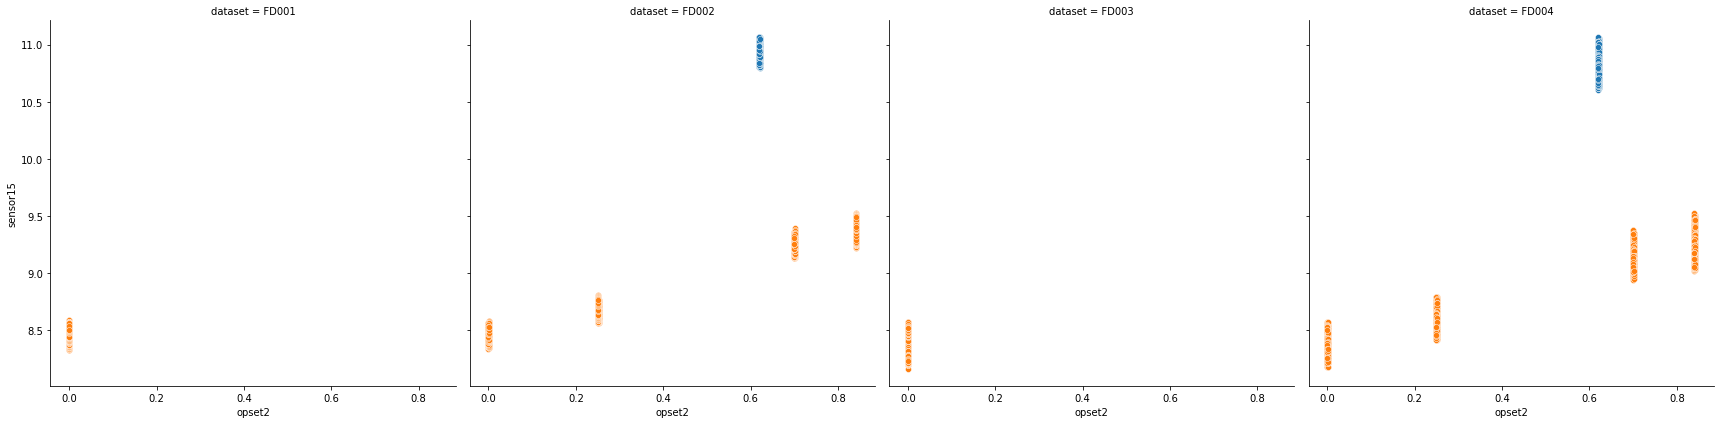

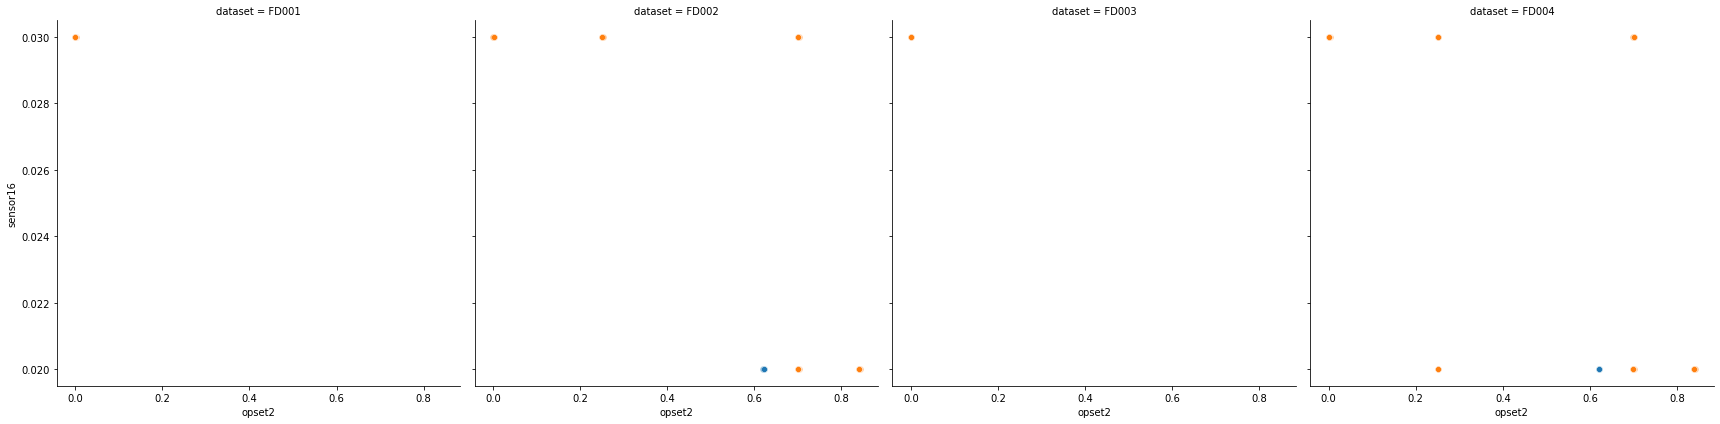

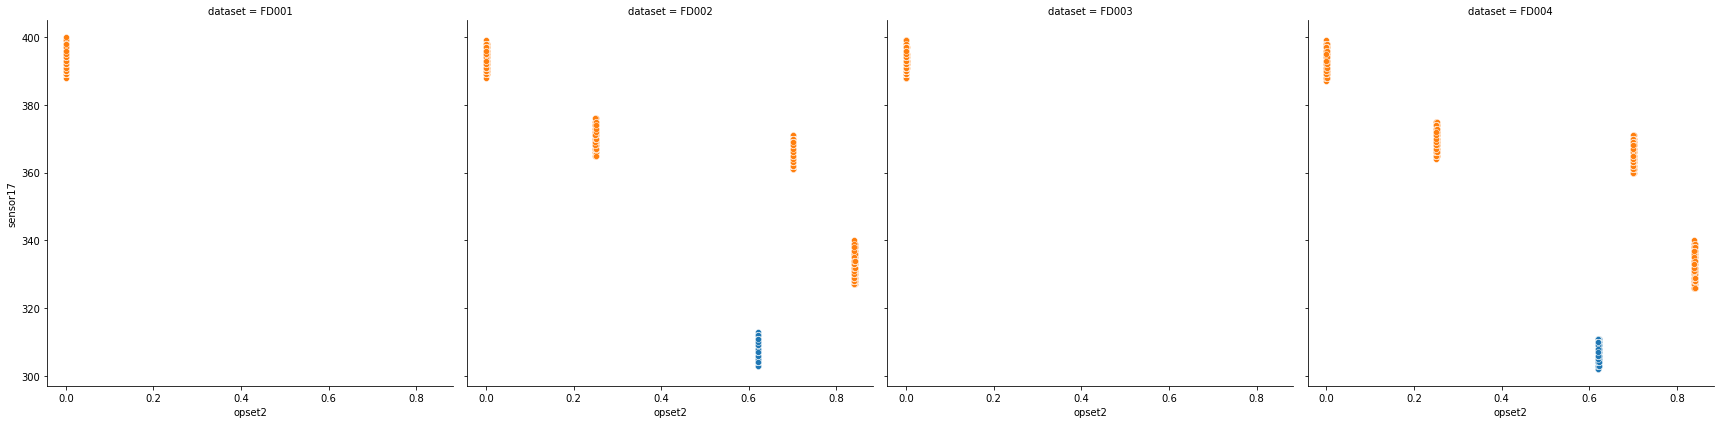

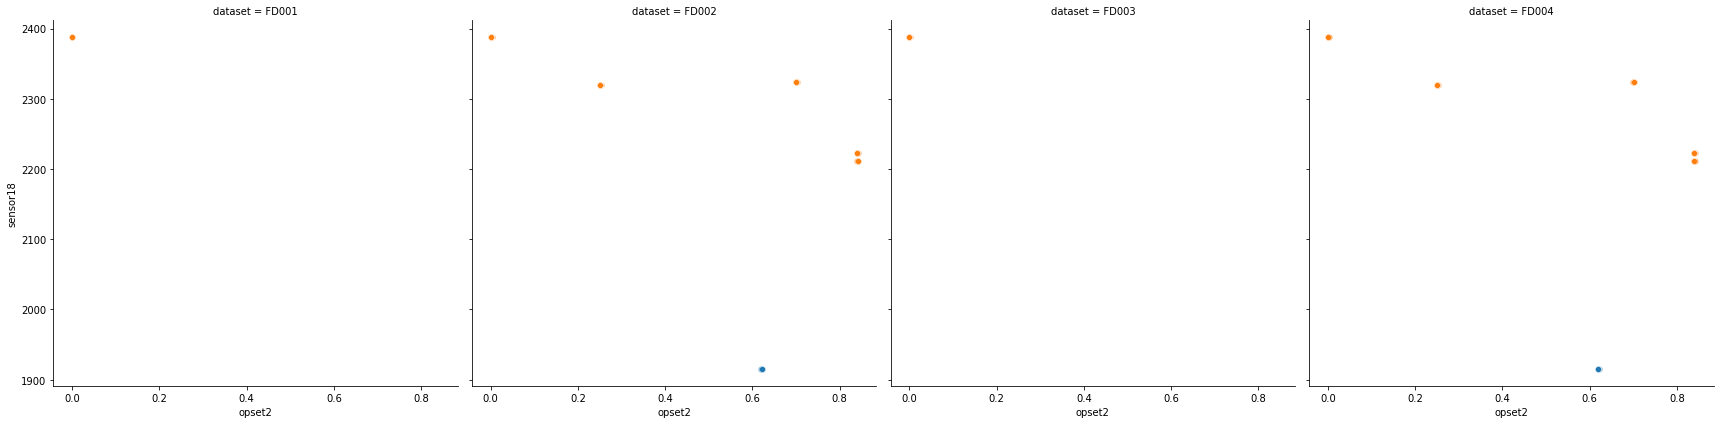

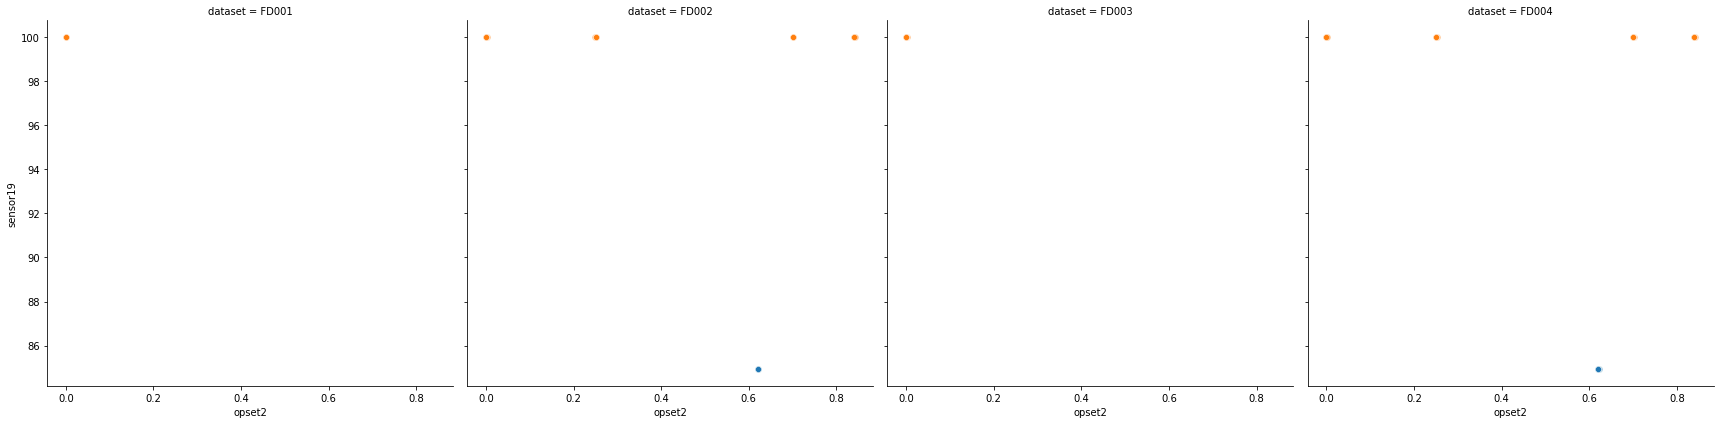

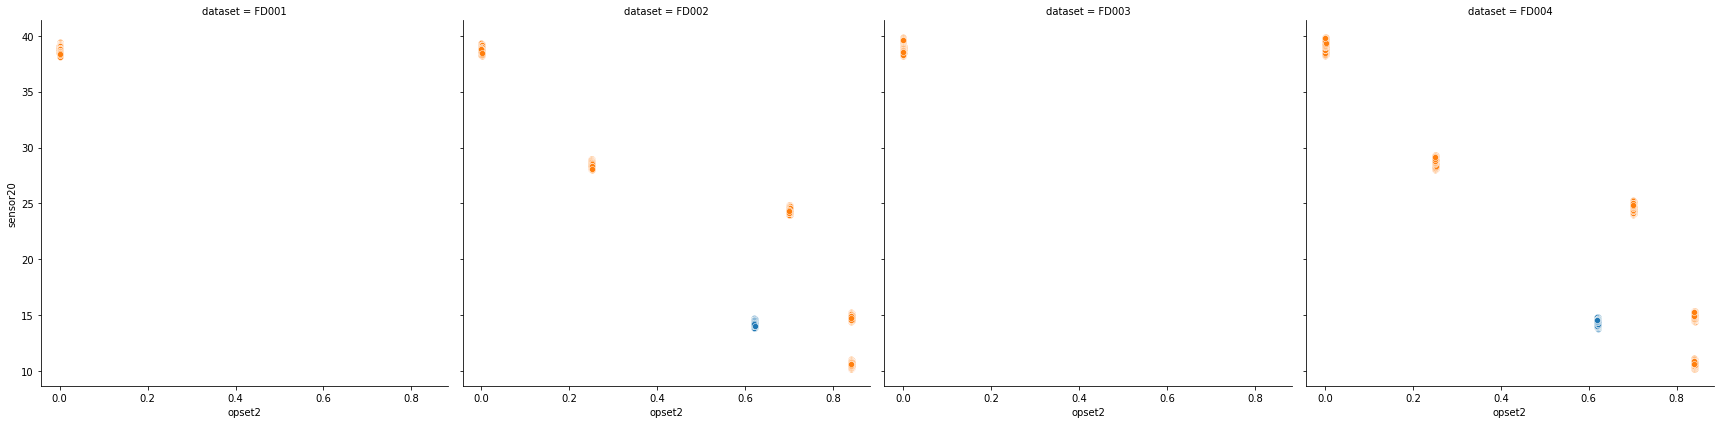

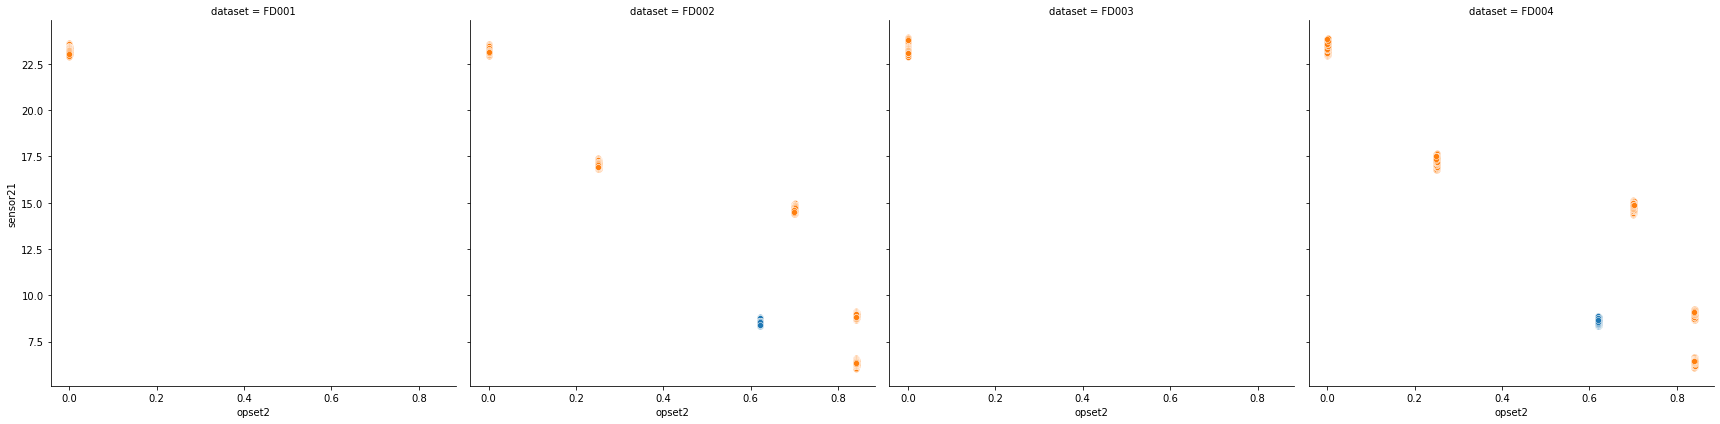

In [73]:
sensors = ['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 
        'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21']
for sensor in sensors:    
    g = sns.FacetGrid(data = train1, col = "dataset", hue= "opset3",size=6)
    g.map(sns.scatterplot, "opset2", sensor)
    plt.show()

Brak wytłumaczenia zmienności sensorów przez opset1 oraz opset2 oraz opset w obrębie klastrów

In [79]:
#kategoryzacja opset1 do 6 poziomów
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(train1[["opset1","opset2"]].to_numpy())


In [82]:
kmeans.labels_

array([2, 2, 2, ..., 2, 1, 4])

In [83]:
train1["condition"] = kmeans.labels_

In [84]:
train1.head()

esn  cycles  opset1  opset2  opset3  sensor1  sensor2  sensor3  sensor4  \
0    1       2  0.0019 -0.0003   100.0   518.67   642.15 1,591.82 1,403.14   
1    1       3 -0.0043  0.0003   100.0   518.67   642.35 1,587.99  1,404.2   
2    1       4  0.0007     0.0   100.0   518.67   642.35 1,582.79 1,401.87   
3    1       5 -0.0019 -0.0002   100.0   518.67   642.37 1,582.85 1,406.22   
4    1       6 -0.0043 -0.0001   100.0   518.67    642.1 1,584.47 1,398.37   

   sensor5  sensor6  sensor7  sensor8  sensor9  sensor10  sensor11  sensor12  \
0    14.62    21.61   553.75 2,388.04 9,044.07       1.3     47.49    522.28   
1    14.62    21.61   554.26 2,388.08 9,052.94       1.3     47.27    522.42   
2    14.62    21.61   554.45 2,388.11 9,049.48       1.3     47.13    522.86   
3    14.62    21.61    554.0 2,388.06 9,055.15       1.3     47.28    522.19   
4    14.62    21.61   554.67 2,388.02 9,049.68       1.3     47.16    521.68   

   sensor13  sensor14  sensor15  sensor16  sensor17  sensor18  sensor19  \
0  2,388.07  8,131.49    8.4318      0.03       392      2388     100.0   
1  2,388.03  8,133.23    8.4178      0.03       390      2388     100.0   
2  2,388.08  8,133.83    8.3682      0.03       392      2388     100.0   
3  2,388.04   8,133.8    8.4294      0.03       393      2388     100.0   
4  2,388.03  8,132.85    8.4108      0.03       391      2388     100.0   

   sensor20  sensor21 dataset  max_cycles  rem_cycles  condition  
0      39.0   23.4236   FD001         192        -190          2  
1     38.95   23.3442   FD001         192        -189          2  
2     38.88   23.3739   FD001         192        -188          2  
3      38.9   23.4044   FD001         192        -187          2  
4     38.98   23.3669   FD001         192        -186          2

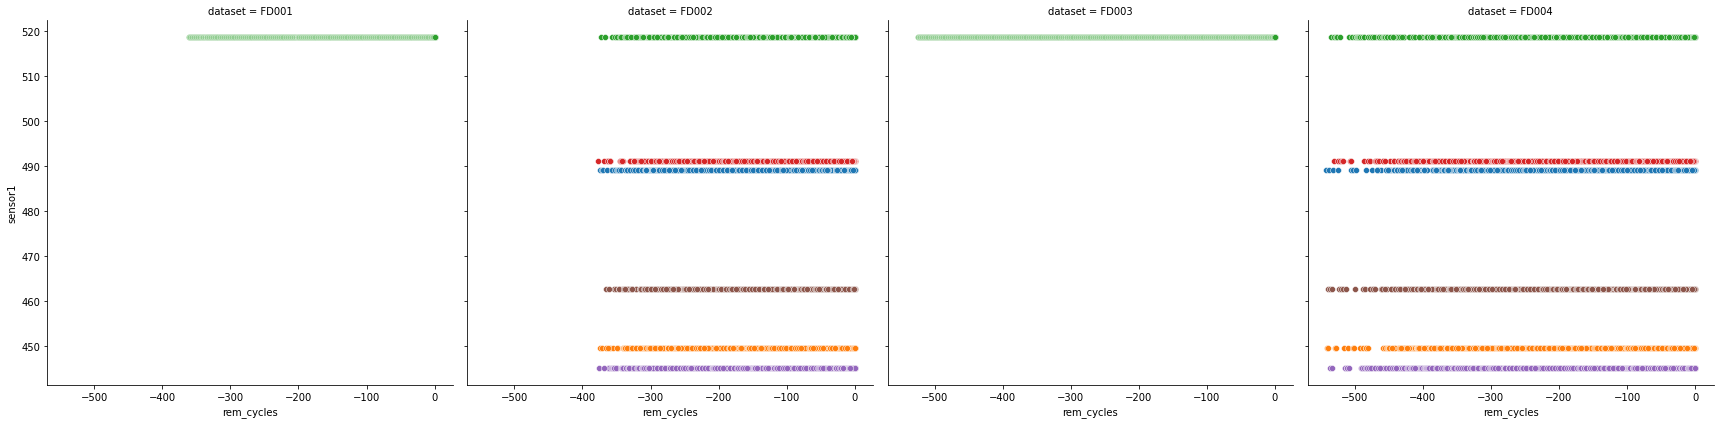

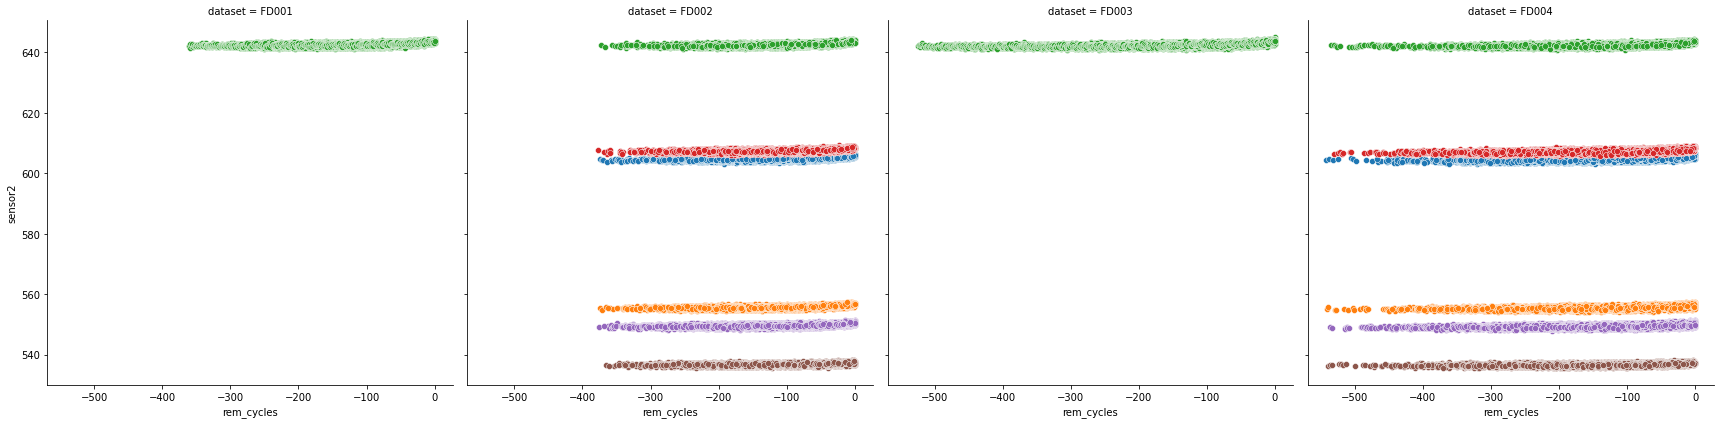

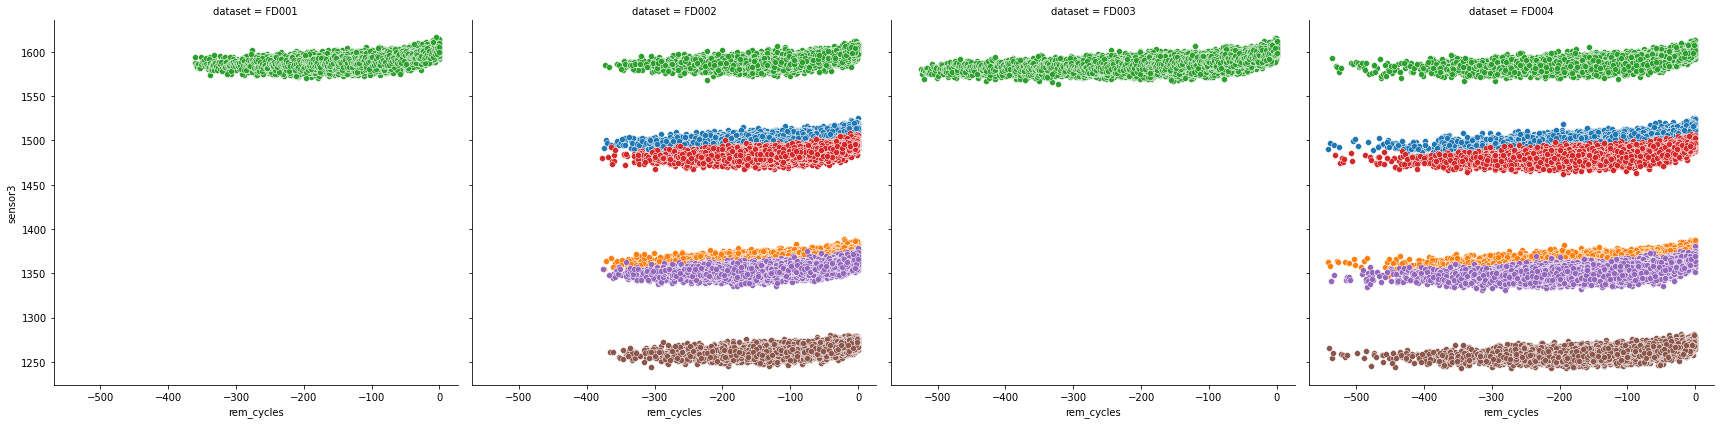

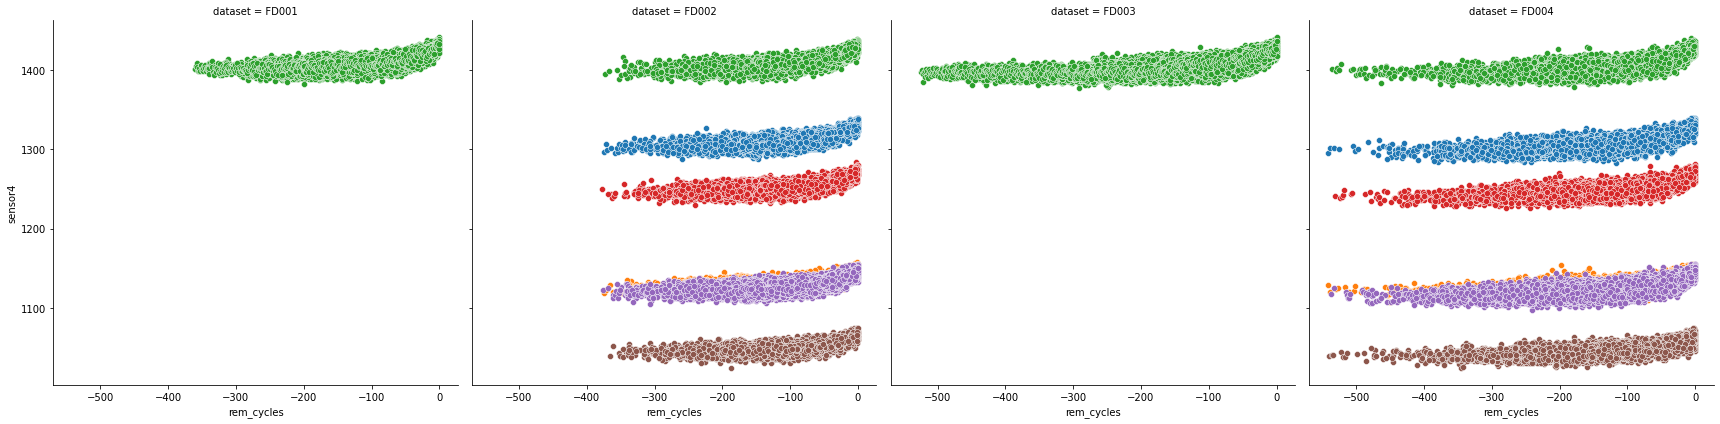

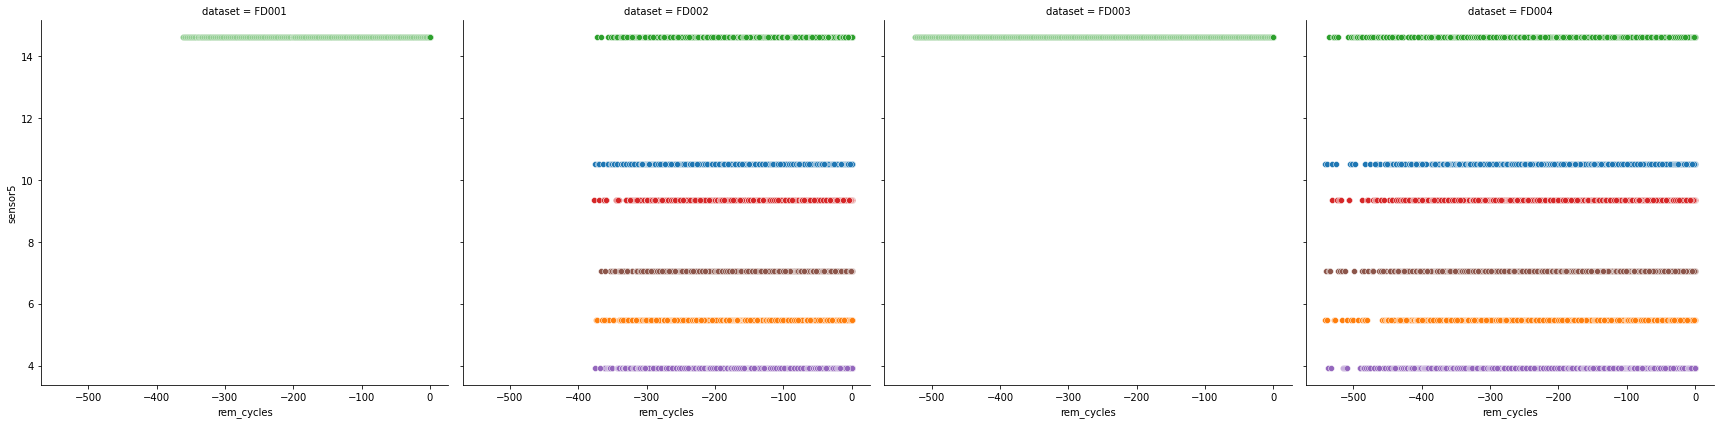

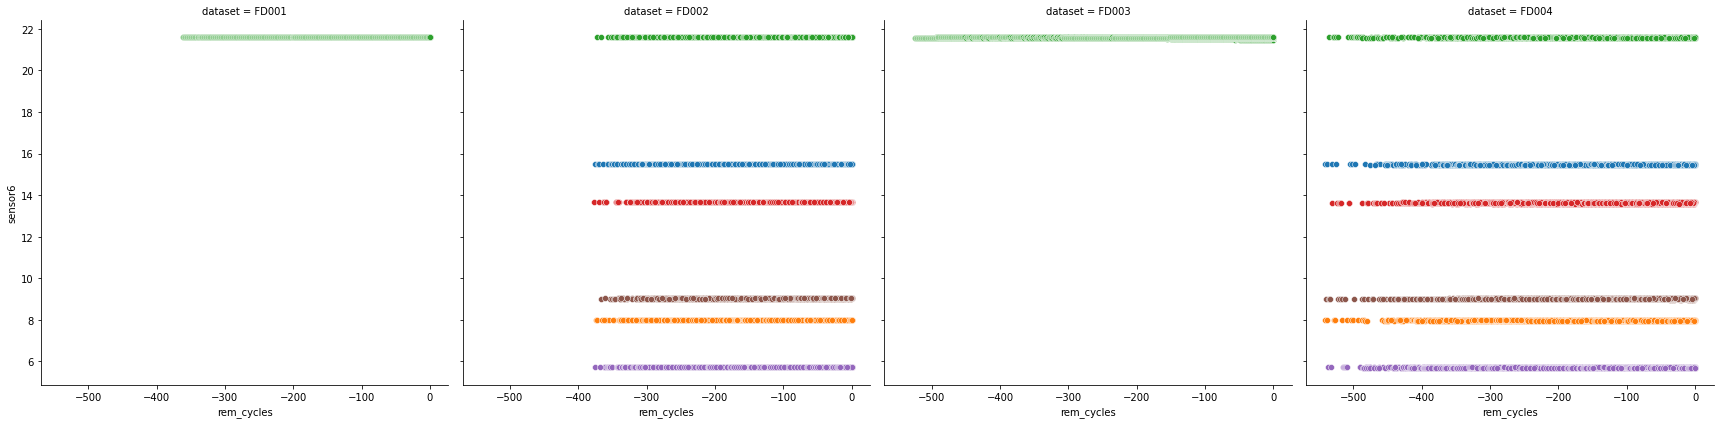

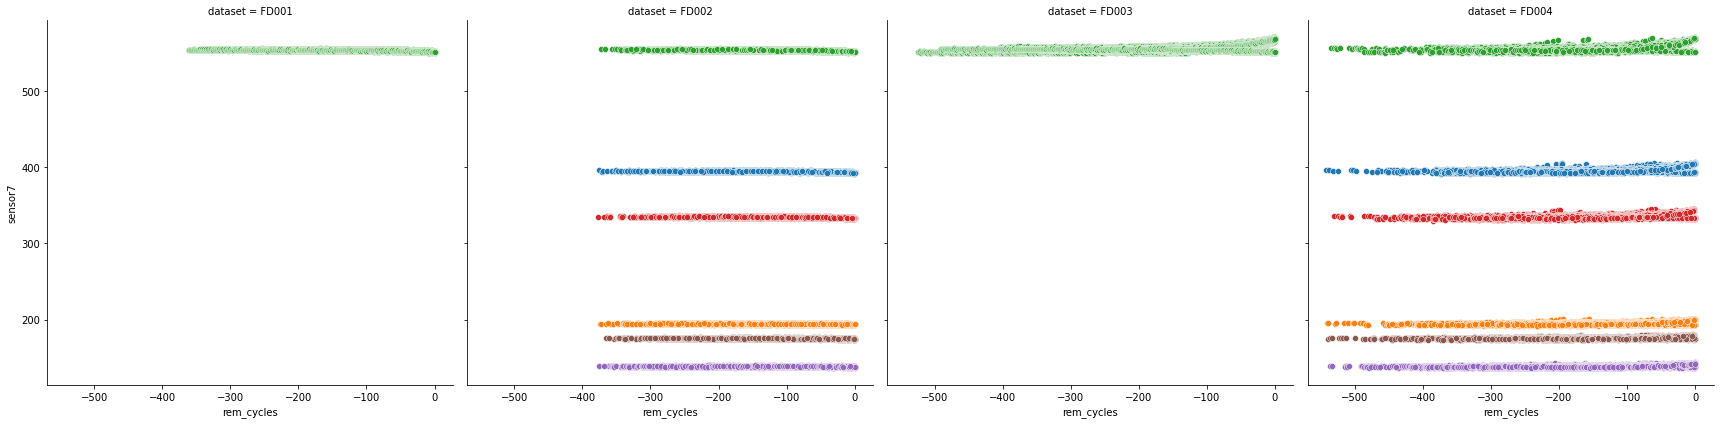

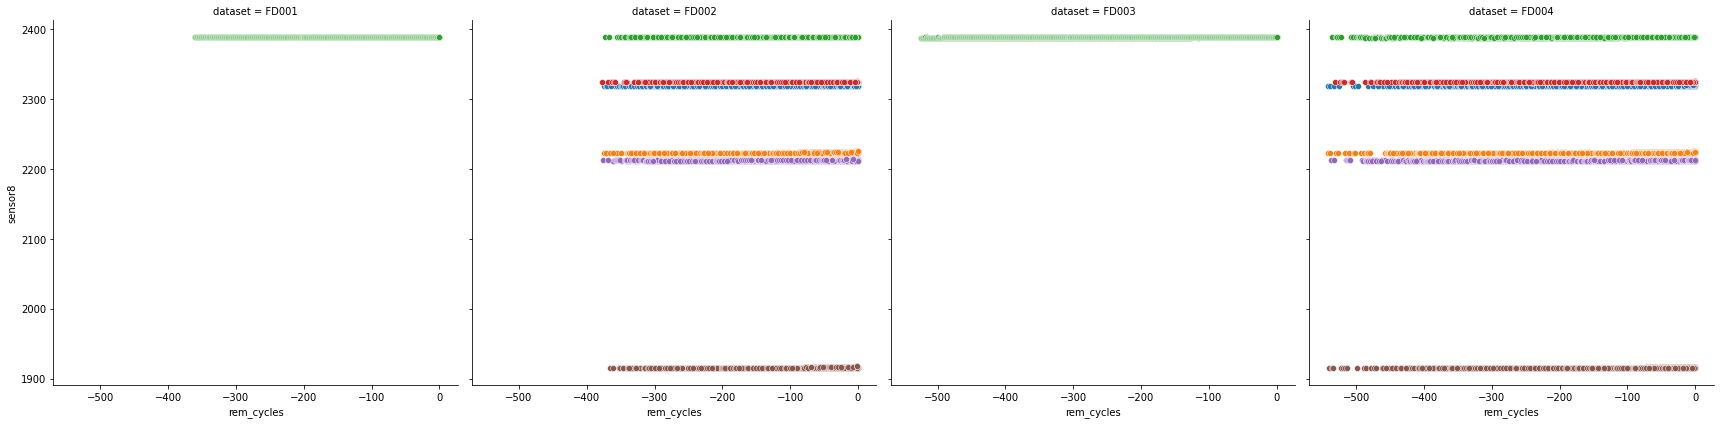

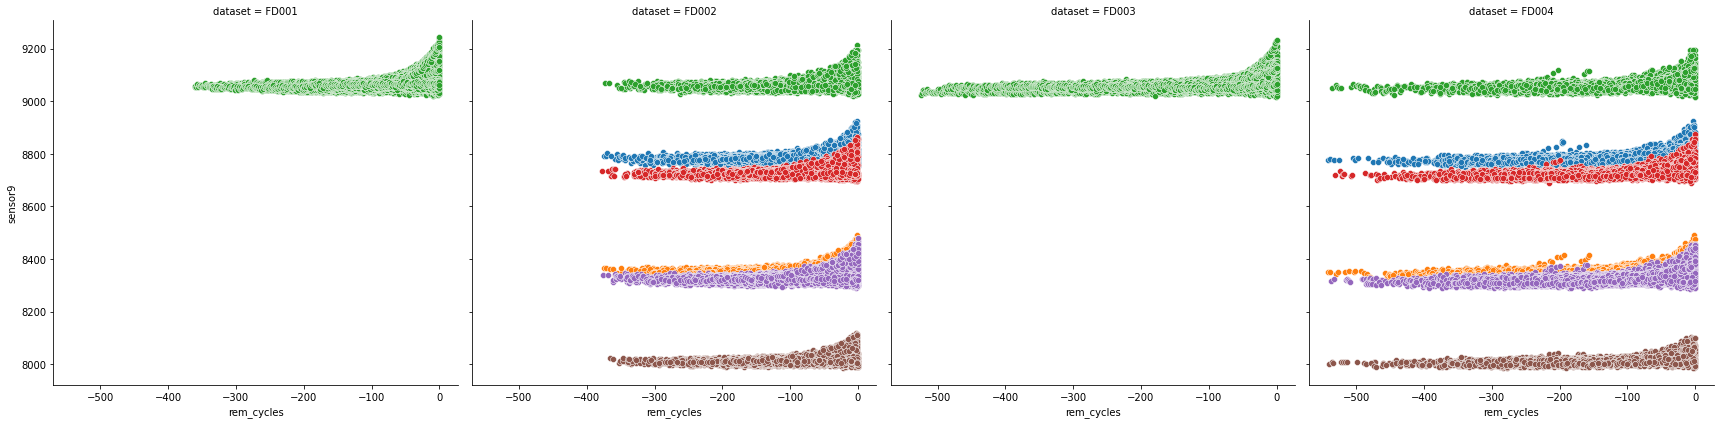

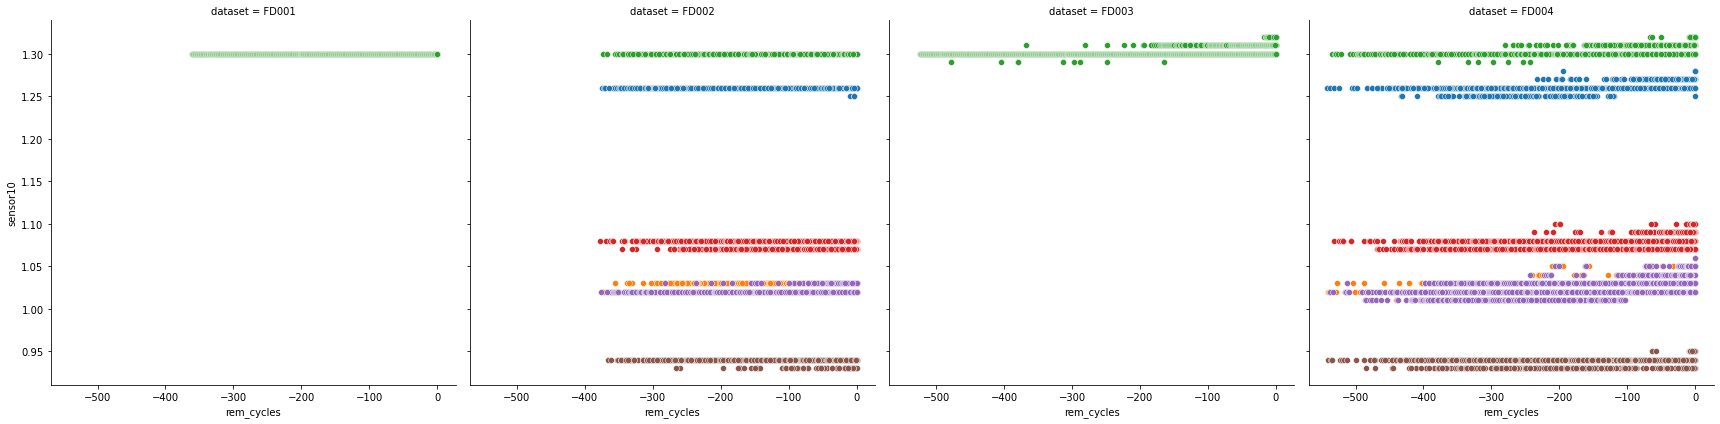

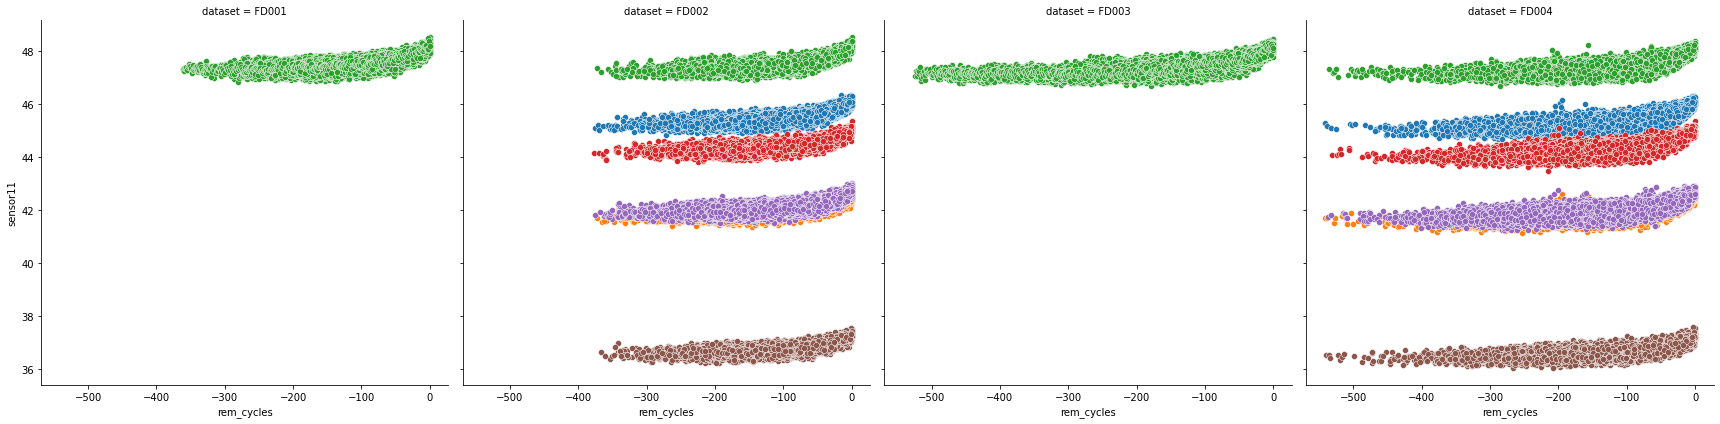

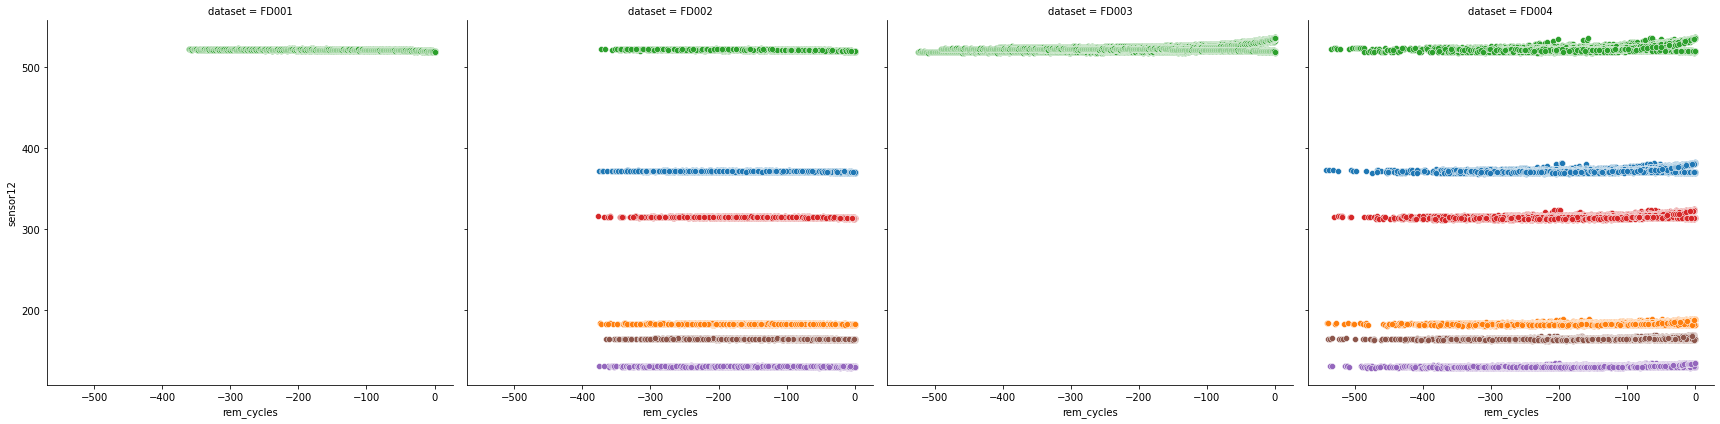

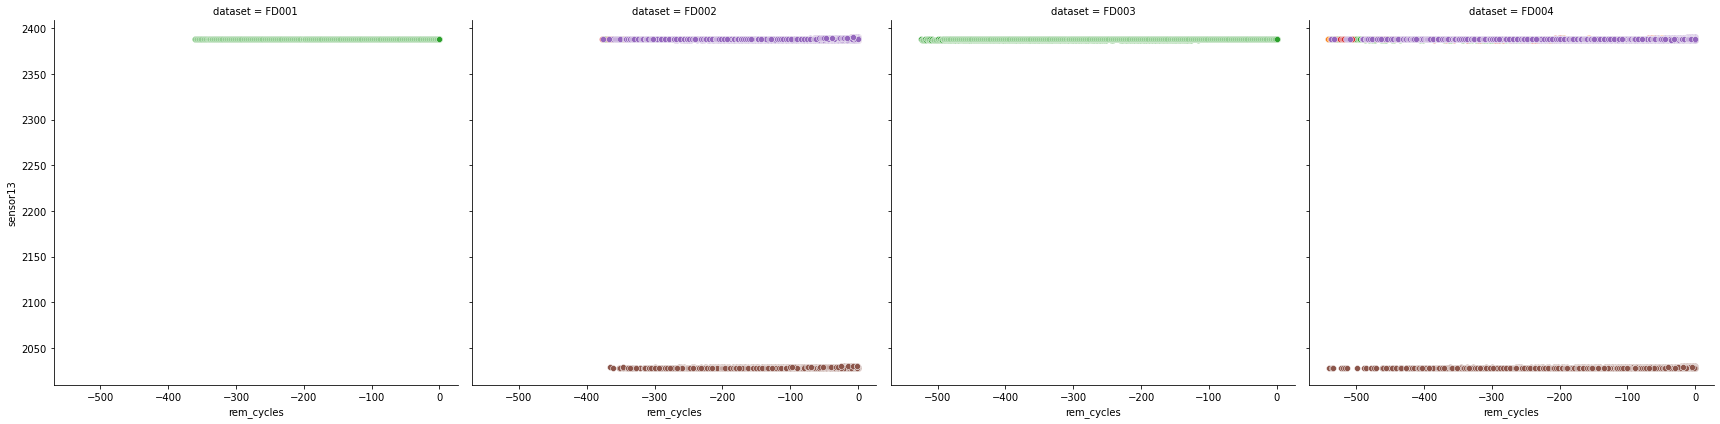

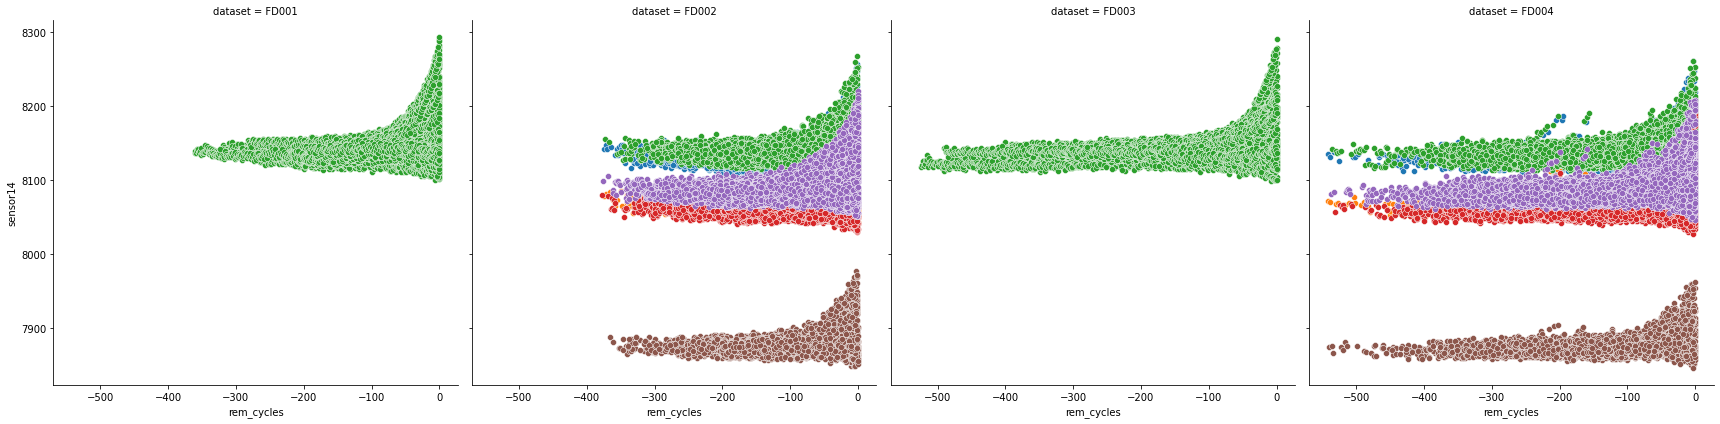

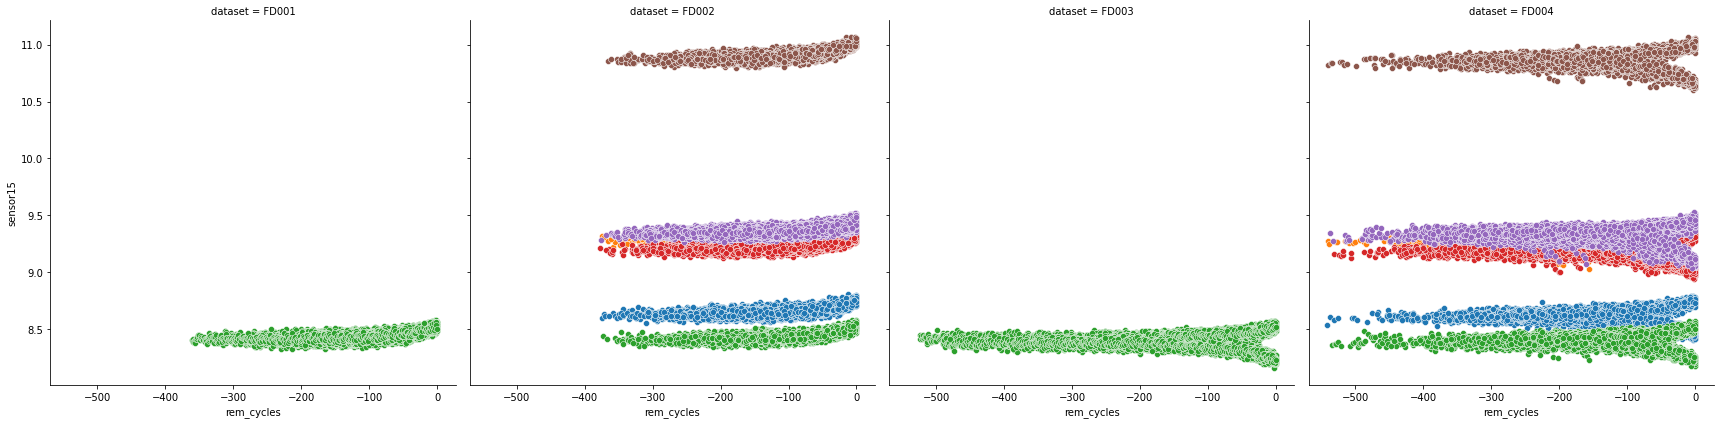

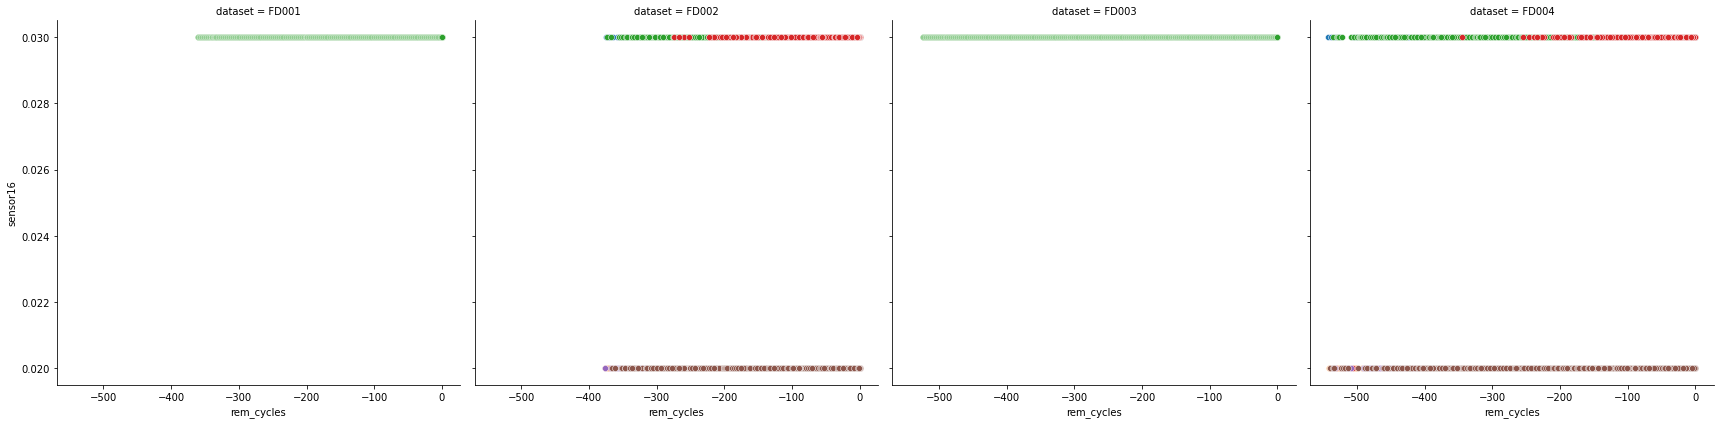

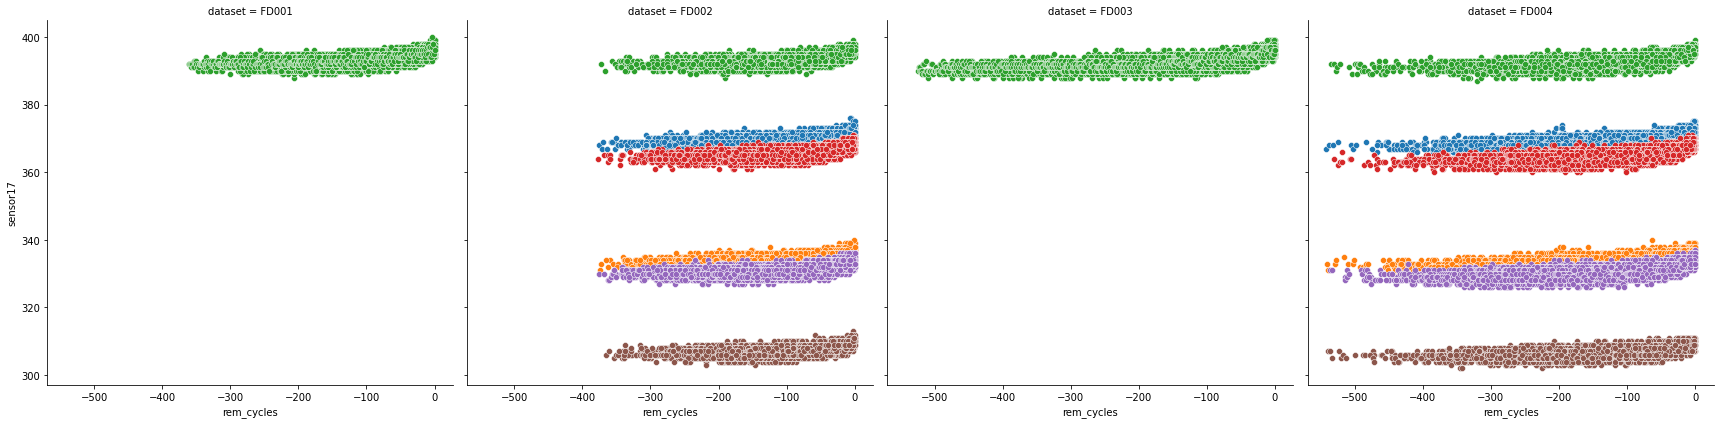

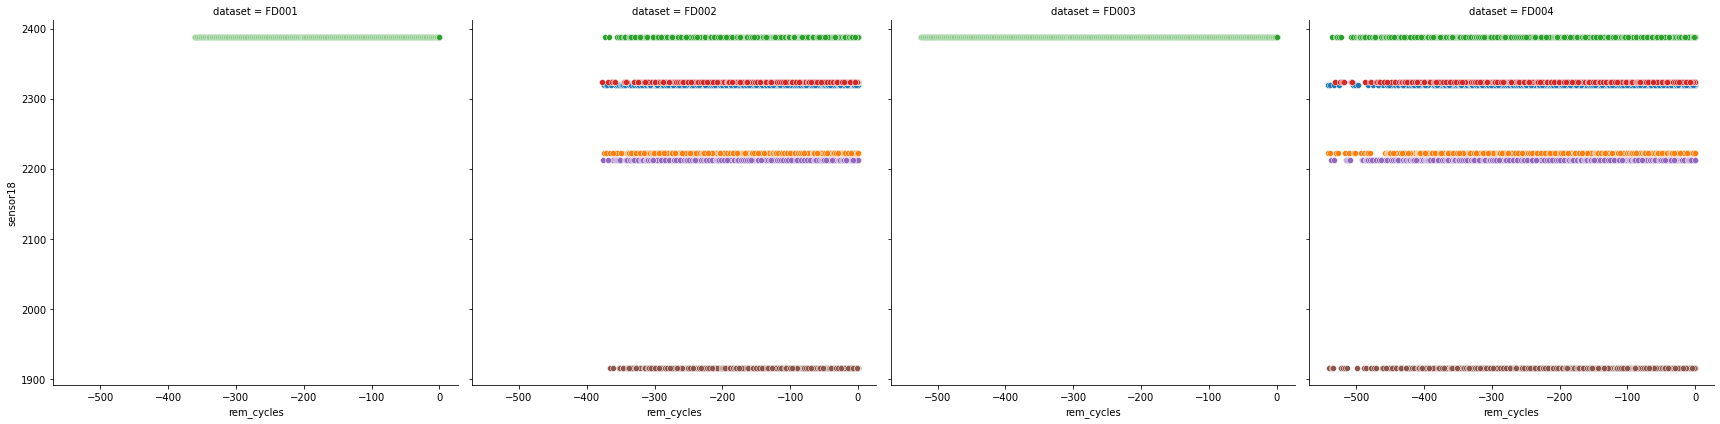

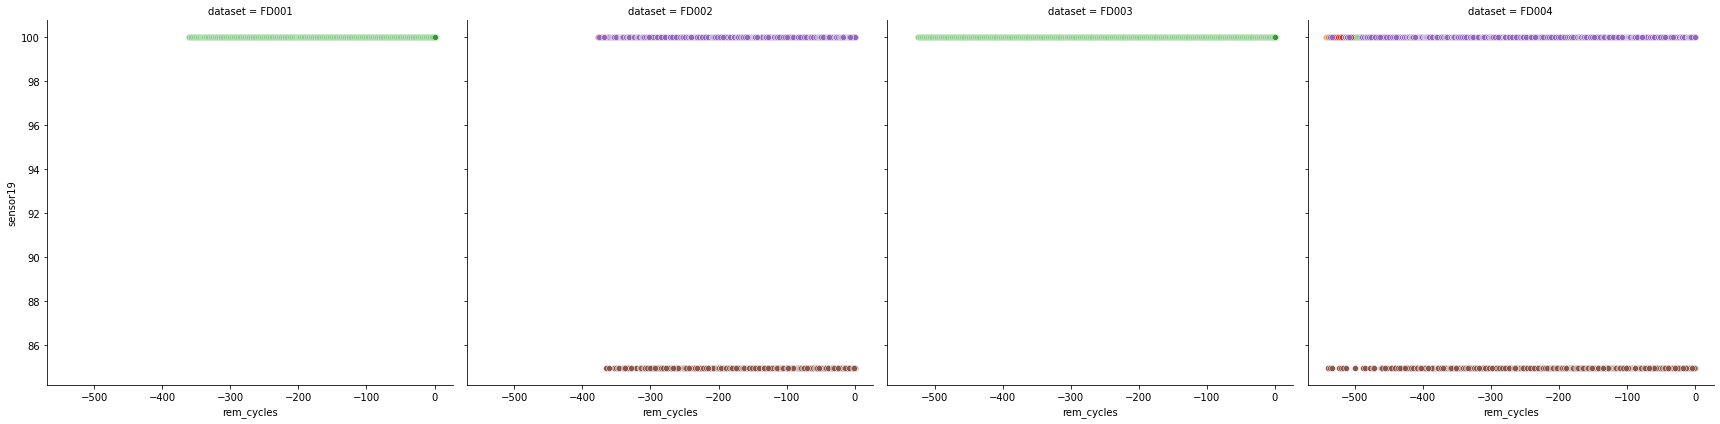

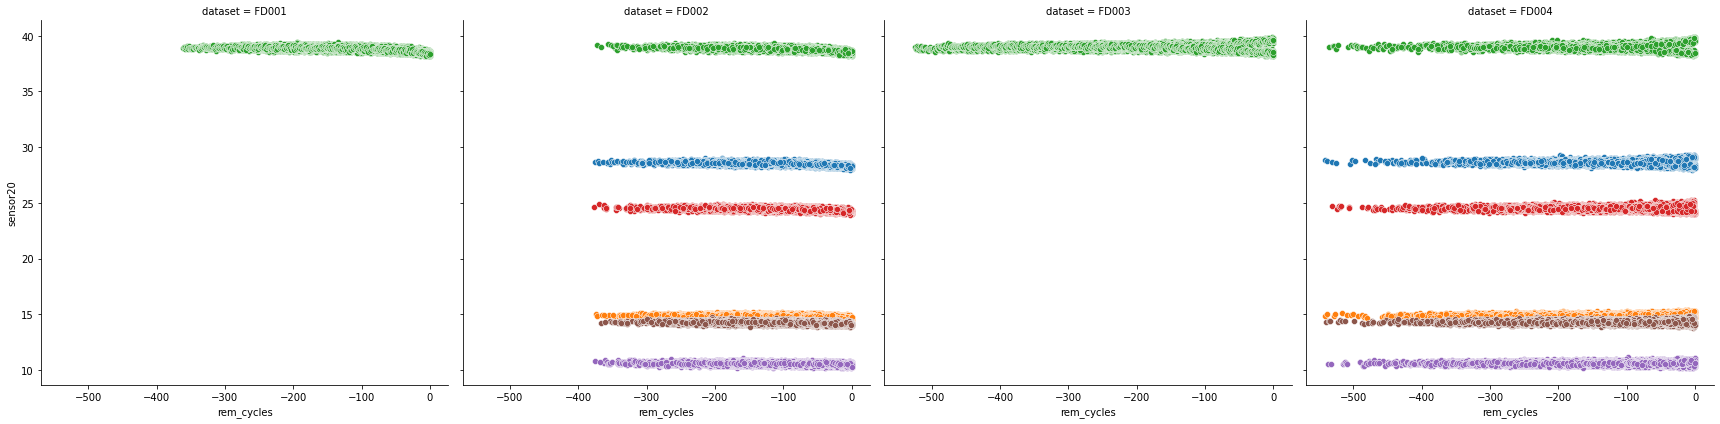

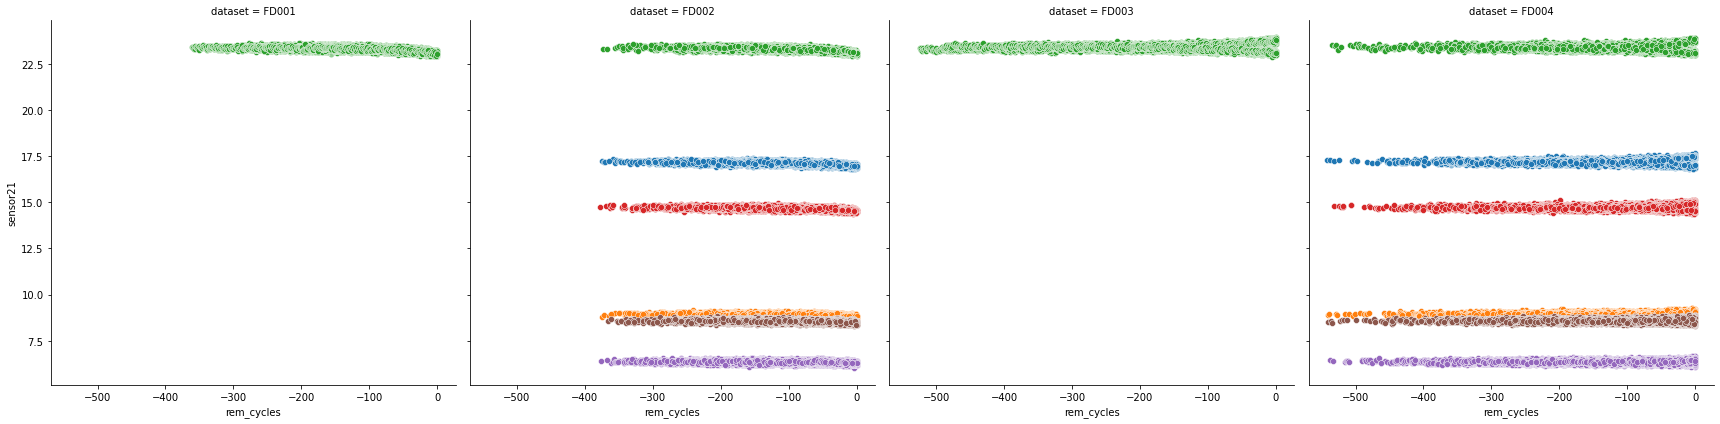

In [85]:
sensors = ['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 
        'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21']
for sensor in sensors:    
    g = sns.FacetGrid(data = train1, col = "dataset", hue= "condition",size=6)
    g.map(sns.scatterplot, "rem_cycles", sensor)
    plt.show()

1. Pierwszy krok do modelu diagnostycznego
2. Feature Engineering >> Klastry na operational parameters
3. Zweryfikowano, że klastry tłumaczą zmienność między zgęstkami (klastrami) odczytów

# Diagnostyka

Flaga 0 - 1 na RUL powyżej 100 cykli do teraz lub parametr analizy : Lead Time
Klasyfikacja na to.
